<h1 align="center">MILESTONE 2 PREDICT EMOTION</h1>
<center><i>Devan Setya Putra<i></center>
<center><i>HCK 004 Phase 2<i></center>

**Dataset: [Emotions Dataset](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp)**

----

# 📝 Problem


> "Emotion is a part that will never be separated from humans. In every line of work, it will certainly not be separated from the word emotion. In this case, we want to assess someone's emotions from the sentences they type or write, which can be applied to reviews, social media chats, and so on."

----

# 📁 File Descriptions
> The data contains various types of sentences divided into 6 emotions: 
- Sadness, Anger, Fear, Joy, Love, Surprise.


----

# 🎯 Goals

> "In this project, the aim is to identify or predict sentences and classify them into which emotion category they belong to, and it aims to be applied to a broader business context, as emotions can be used in a wide range of fields."
-----



---
# 📚 Library

-----


## Install Library



In [1]:
!pip install phik
!pip install feature_engine
!pip install tensorflow
!pip install summarizer
!pip install transformers
!pip install Sastrawi
!pip install stopwords
!pip install imbalanced-learn
!pip install phik
!pip install feature_engine
!pip install tensorflow
!pip install nltk
!pip install stopwords
!pip install wordcloud
!pip install pillow

import nltk
nltk.download('punkt')
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('stopwords')
nltk.download('tokenizers')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading tokenizers: Package 'tokenizers' not found
[nltk_data]     in index


False

## Import Library

In [85]:
#Library
import numpy as np
import pandas as pd 
import re

# Visual
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Preprocessing
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Tensorflow
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout, Embedding, Dense,Lambda,Bidirectional


# NLP
import nltk
from nltk import tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.cluster.util import cosine_distance
from keras.preprocessing.text import Tokenizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


#evaluation
from keras.utils import to_categorical
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


import networkx as nx
import codecs
from summarizer import Summarizer


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/My Drive/ML2

/content/drive/My Drive/ML2


----
# 📊 Loading Data
----

In [5]:
# read CSV untuk memanggil data csv, dan missing value untuk memastikan bahwa tidak ada lagi uniq missing value
missing_values = ["n/a", "na", "--",' ?', 'inf']
data=pd.read_csv("NLP_Dataset.csv", na_values = missing_values, skipinitialspace=True)
df= data.copy()
df.head(10) #viewing the first 10 data

text  emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness
5  i cant walk into a shop anywhere where i do no...     fear
6   i felt anger when at the end of a telephone call    anger
7  i explain why i clung to a relationship with a...      joy
8  i like to have the same breathless feeling as ...      joy
9  i jest i feel grumpy tired and pre menstrual w...    anger

----
# 🧹Cleaning Data

---

In [6]:
df.describe(include=object)

text emotion
count                                               20000   20000
unique                                              19948       6
top     i was intensely conscious of how much cash i h...     joy
freq                                                    2    6761

> If you look at the data description, it can be seen that the number of unique values and the count are not the same, which suggests that the data may have duplicates and need to be handled.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     20000 non-null  object
 1   emotion  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


> If we look at the data information, it can be seen that there are `20.000` non-null data out of a total of `20,000`, so it can be said that the data does not have missing values (although it will be checked again for certainty).

## Handle Duplicate

In [8]:
# "To see how many duplicates are in the text column."
df['text'].duplicated().sum()

52

In [9]:
# "To see which columns have duplicate data."
df[df['text'].duplicated(keep=False)]

text   emotion
86     i feel like i am in paradise kissing those swe...       joy
262    i realized what i am passionate about helping ...       joy
265    i feel so blessed and honored that we get to b...      love
353    i could feel his breath on me and smell the sw...       joy
415    i loved the feeling i got during an amazing sl...       joy
...                                                  ...       ...
19230  i don t always feel like i have amazing style ...  surprise
19626  i feel completely blessed to be a part of this...       joy
19672  i feel that being faithful isnt enough in your...      love
19788  i feel like i am in paradise kissing those swe...      love
19993                           i feel so tortured by it     anger

[104 rows x 2 columns]

> "The output data shows that there are 52 duplicated text data, therefore handling (dropping) is needed to eliminate the duplicated data so as to avoid confusion in the learning process for the model."

In [10]:
# "To remove duplicate columns, and keep only one column to prevent duplication."
df.drop_duplicates(subset='text', keep='first', inplace=True)

In [11]:
# "There are no more duplicate data now."
df['text'].duplicated().sum()

0

## Handle and Check Missing Value

In [12]:
# "To check if there are any missing values in the dataframe (There are no missing values)."
df.isnull().sum()

text       0
emotion    0
dtype: int64

----

# 🔍 Exploratory Analysis

----

## Target

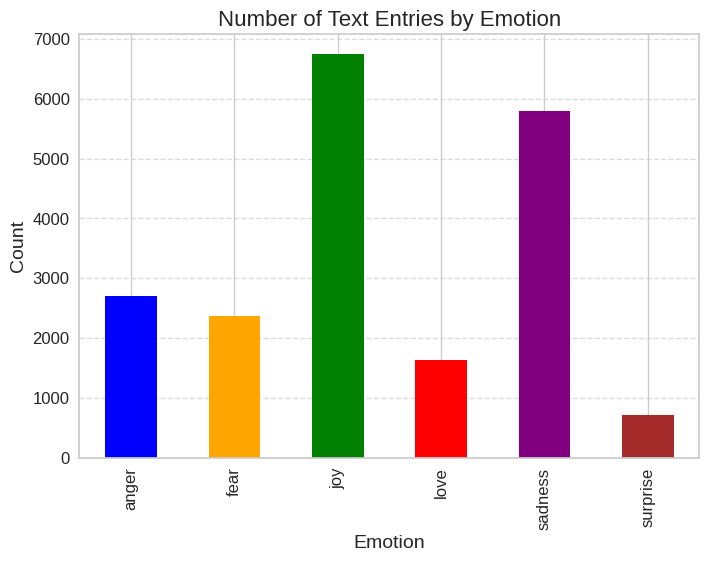

In [13]:
# Group the dataframe by emotion and count the number of text entries in each group
counts = df.groupby('emotion')['text'].count()

# Set the color scheme for the plot
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Create the bar plot
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax, color=colors)

# Set the plot title and axis labels
ax.set_title("Number of Text Entries by Emotion", fontsize=16)
ax.set_xlabel("Emotion", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Increase the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Add grid lines to the plot
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


>It can be observed from the above data that the most frequent text is for the emotion of joy, while the least frequent is for surprise. Therefore, this data is unbalanced in terms of its values.

## Word Cloud

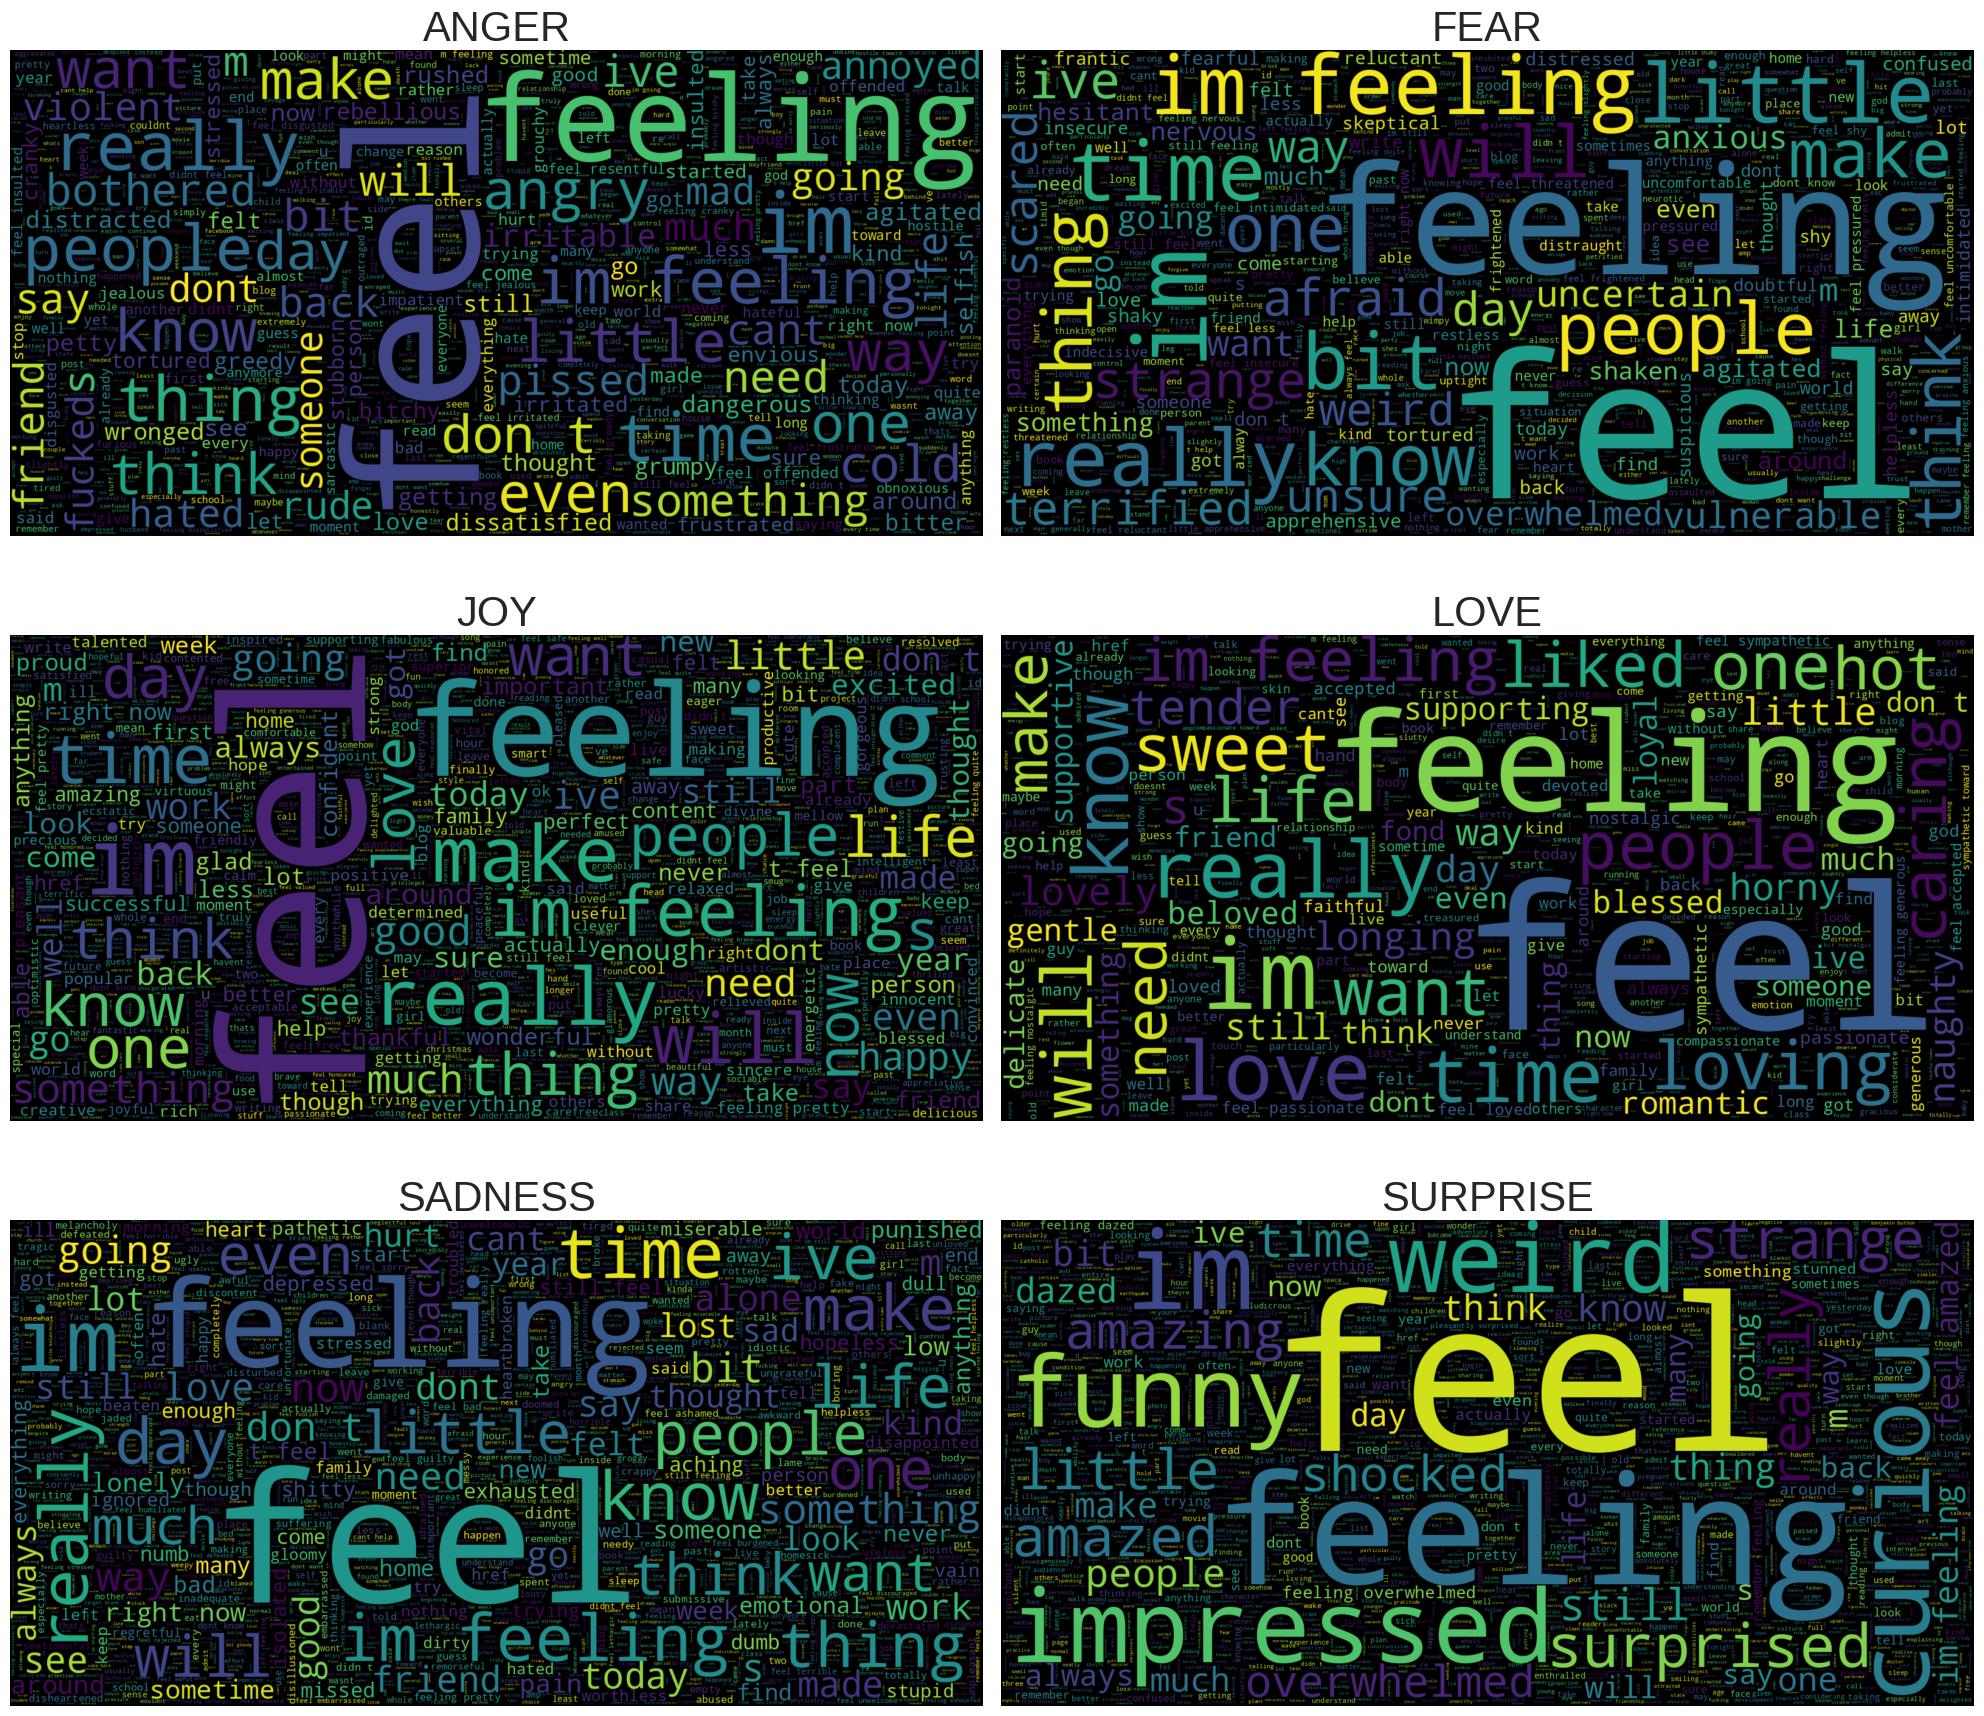

In [14]:
#"To create a word cloud for the words emotion."

# define emotions
emotions = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

# create subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

# loop through emotions and plot wordcloud in corresponding subplot
for i, emotion in enumerate(emotions):
    row = i // 2
    col = i % 2
    wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(df[df['emotion'] == emotion]['text']))
    axs[row, col].imshow(wc, interpolation='bilinear')
    axs[row, col].set_title(emotion.upper(), fontsize=30)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

> A word cloud is a visual representation of text data, in which the size of each word indicates its frequency or importance in the text. In a word cloud, words are arranged in a random or semi-random pattern, with the most frequently occurring words given prominence by being displayed in larger fonts or with brighter colors.

Source = [Word Cloud](https://medium.com/@harinisureshla/wordclouds-basics-of-nlp-5b60be226414)

----
# ⚙️ Feature Engineering

---

## Balancing Data
> Because the data is unbalanced, to avoid significant differences between the number of samples for each emotion, a maximum of 3000 samples per label will be taken (for emotion with more than 3000 samples).

In [15]:
df.groupby('emotion')['emotion'].count()

emotion
anger       2704
fear        2366
joy         6743
love        1628
sadness     5794
surprise     713
Name: emotion, dtype: int64

In [16]:
# filter the dataframes
joy = df.loc[df['emotion'] == 'joy'].sample(3000)
sadness = df.loc[df['emotion']=='sadness'].sample(3000)
anger = df.loc[df['emotion']=='anger']
fear = df.loc[df['emotion']=='fear']
love = df.loc[df['emotion']=='love']
surprise = df.loc[df['emotion']=='surprise']

# concatenate the dataframes
df_fix = pd.concat([sadness, joy, fear, anger, love, surprise])

# reset the index
df_fix = df_fix.reset_index(drop=True)
df_fix.groupby('emotion')['emotion'].count()

emotion
anger       2704
fear        2366
joy         3000
love        1628
sadness     3000
surprise     713
Name: emotion, dtype: int64

## Preprocess Text

>This function is used to preprocess text by removing numbers, emojis, whitespaces, and other unwanted characters before modeling.

In [17]:
# Define a function to preprocess the text
def preprocess_text(text):
    """
    Preprocess the text by converting to lowercase, removing stop words, and removing non-alphabetic characters.
    """
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if not token in stop_words]
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply the preprocessing function to the 'text' column
df_fix['preprocessed_text'] = df_fix['text'].apply(preprocess_text)

>This code is used to view and count the number of tokens and the tokens themselves in each row of the dataframe, after the text has been preprocessed.

In [18]:
# Create an empty column "tokens"
df_fix['tokens'] = ''

# Loop through all the rows of the "text" column
for index in df_fix.index:
    # Get the text from the current row
    text = df_fix.loc[index]['preprocessed_text']
    # Tokenize the text using regular expressions
    tokens = re.findall('\w+', text)
    # Store the tokens in the "tokens" column for the current row
    df_fix.at[index, 'tokens'] = tokens
    # Count the number of tokens and store it in a new column called "num_tokens"
    df_fix.at[index, 'num_tokens'] = len(tokens)

## Lemmatizer

> Lemmatizer is a technique in natural language processing used to convert words into their base form or lemma. In English, a lemma is the base form of a word as listed in a dictionary, such as "run" or "jump". The goal of lemmatization is to produce a more consistent representation of words in text, which can aid in natural language analysis, including text modeling. By using lemmatization, various word forms that have the same meaning can be simplified into one base word, reducing data complexity and improving modeling accuracy.

In [19]:

# Initialize the WordNetLemmatizer
wnl = WordNetLemmatizer()

# Define a function to lemmatize each word in a sentence
def lemmatize_sentence(sentence):
    """
    Lemmatize each word in a sentence and return the lemmatized sentence.
    """
    tokenized_sentence = nltk.word_tokenize(sentence)
    lemmatized_sentence = [wnl.lemmatize(word, pos='v') for word in tokenized_sentence]
    return lemmatized_sentence

# Define a function to replace 'im' with 'i am' in a sentence
def replace_im(sentence):
    """
    Replace 'im' with 'i am' in a sentence and return the new sentence.
    """
    return sentence.replace('im', 'i am').replace('wanna', 'want').replace('rfttttttttttsjiowefmklldkavsvdsbtwrsbdvfocxfibjxrklrgrmvaeridubneosdvfrwfd','') # I found weird text

# Apply lemmatization and token replacement to the 'text' column
df_fix['lemma'] = df_fix['preprocessed_text'].apply(lambda x: lemmatize_sentence(replace_im(x)))

# Count the number of lemmas and store it in a new column called "num_lemmas"
df_fix['num_lemmas'] = df_fix['lemma'].apply(lambda x: len(x))

# Assuming you have a pandas DataFrame named 'df_fix'
joined_lemmas = [' '.join(lemmas) for lemmas in df_fix['lemma']]
df_fix['joined_lemmas'] = joined_lemmas

# View the resulting DataFrame
df_fix

text   emotion  \
0                        i hate this feeling of helpless   sadness   
1      i really wanna see her soon but i feel really ...   sadness   
2      i was still feeling terrible sore throat body ...   sadness   
3      i feel like ive had to fake my feelings a lot ...   sadness   
4      i didnt feel any real emotional connection thi...   sadness   
...                                                  ...       ...   
13406  i feel funny inside is that a reference to the...  surprise   
13407  i almost feel funny not adding a picture at th...  surprise   
13408                  im just feeling so dazed everyday  surprise   
13409  i as representative of everything thats wrong ...  surprise   
13410  i feel i should make is how surprised but ente...  surprise   

                                       preprocessed_text  \
0                                  hate feeling helpless   
1      really wan na see soon feel really needy askin...   
2      still feeling terrible sore throat body aches ...   
3      feel like ive fake feelings lot often would liked   
4      didnt feel real emotional connection much char...   
...                                                  ...   
13406  feel funny inside reference circus going under...   
13407  almost feel funny adding picture bottom post l...   
13408                          im feeling dazed everyday   
13409  representative everything thats wrong corporat...   
13410  feel make surprised entertained inclusion many...   

                                                  tokens  num_tokens  \
0                              [hate, feeling, helpless]         3.0   
1      [really, wan, na, see, soon, feel, really, nee...        10.0   
2      [still, feeling, terrible, sore, throat, body,...        11.0   
3      [feel, like, ive, fake, feelings, lot, often, ...         9.0   
4      [didnt, feel, real, emotional, connection, muc...         9.0   
...                                                  ...         ...   
13406  [feel, funny, inside, reference, circus, going...         7.0   
13407  [almost, feel, funny, adding, picture, bottom,...        10.0   
13408                     [im, feeling, dazed, everyday]         4.0   
13409  [representative, everything, thats, wrong, cor...        11.0   
13410  [feel, make, surprised, entertained, inclusion...        13.0   

                                                   lemma  num_lemmas  \
0                                 [hate, feel, helpless]           3   
1      [really, wan, na, see, soon, feel, really, nee...          10   
2      [still, feel, terrible, sore, throat, body, ac...          11   
3      [feel, like, ive, fake, feel, lot, often, woul...           9   
4      [didnt, feel, real, emotional, connection, muc...           9   
...                                                  ...         ...   
13406  [feel, funny, inside, reference, circus, go, u...           7   
13407  [almost, feel, funny, add, picture, bottom, po...          10   
13408                      [i, be, feel, daze, everyday]           5   
13409  [representative, everything, thats, wrong, cor...          11   
13410  [feel, make, surprise, entertain, inclusion, m...          13   

                                           joined_lemmas  
0                                     hate feel helpless  
1       really wan na see soon feel really needy ask see  
2      still feel terrible sore throat body ache stuf...  
3           feel like ive fake feel lot often would like  
4      didnt feel real emotional connection much char...  
...                                                  ...  
13406   feel funny inside reference circus go underpants  
13407  almost feel funny add picture bottom post like...  
13408                            i be feel daze everyday  
13409  representative everything thats wrong corporat...  
13410  feel make surprise entertain inclusion many po...  

[13411 rows x 8 columns]

## Stopword

> A stopword is a commonly used word in a language that is usually removed from text processing because it is unlikely to carry any meaningful information or context. Examples of stopwords in the English language include words such as "the", "and", "is", "a", "an", "in", "of", and "to", among others.

> The reason for removing stopwords is to reduce the amount of noise in a text document and focus on the important words that can be used for analysis. By eliminating these words, it becomes easier to identify and extract keywords, and to perform natural language processing tasks such as sentiment analysis, topic modeling, and text classification.

Source= [Stopword](https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a)

In [20]:
# Create a dictionary to store the word frequency
word_freq = {}
for tokens in df_fix['lemma']:
    for token in tokens:
        if token in word_freq:
            word_freq[token] += 1
        else:
            word_freq[token] = 1
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

# Plot all words by frequency
top_words = list(sorted_word_freq.keys())
word_counts = [sorted_word_freq[word] for word in top_words]

# Create a dictionary to store the data
words = {'word': top_words, 'word_counts': word_counts}

# Convert the dictionary to a pandas DataFrame
word_df = pd.DataFrame(words)

# Make a precentage from word counts
word_df['frequency_word %'] = (word_df['word_counts'].apply(lambda x: x/word_df['word_counts'].sum()))*100
word_df

# View the DataFrame
word_df

word  word_counts  frequency_word %
0                feel        14189         10.971074
1                like         2491          1.926066
2                   i         2484          1.920653
3                  be         2119          1.638432
4                 get         1104          0.853624
...               ...          ...               ...
11144     autocorrect            1          0.000773
11145      underpants            1          0.000773
11146           denis            1          0.000773
11147  representative            1          0.000773
11148       inclusion            1          0.000773

[11149 rows x 3 columns]

> In the process of searching for stopwords in the dataset that is owned, separation is done from the lemma column and will be grouped and searched for the highest number of each word. The top 100 words will be considered as stopwords.

In [21]:
# This is the stopword list from the dataset.
word_df['word'].head(100).unique()

array(['feel', 'like', 'i', 'be', 'get', 'make', 'go', 'know', 'ti',
       'really', 'think', 'want', 'ame', 'little', 'love', 'people',
       'would', 'say', 'one', 'even', 'still', 'ive', 'bite', 'need',
       'life', 'much', 'something', 'way', 'dont', 'start', 'things',
       'could', 'come', 'see', 'take', 'work', 'back', 'day', 'try',
       'look', 'ames', 'leave', 'pretty', 'always', 'find', 'right',
       'also', 'good', 'today', 'help', 'around', 'write', 'give', 'cant',
       'tell', 'someone', 'though', 'less', 'didnt', 'long', 'lot', 'use',
       'felt', 'every', 'well', 'never', 'many', 'live', 'read', 'quite',
       'days', 'sure', 'talk', 'kind', 'keep', 'amaze', 'person',
       'everything', 'remember', 'let', 'home', 'away', 'anything',
       'care', 'last', 'ever', 'without', 'world', 'overwhelm', 'someti',
       'friends', 'happy', 'new', 'end', 'actually', 'enough', 'http',
       'thing', 'strange', 'better'], dtype=object)

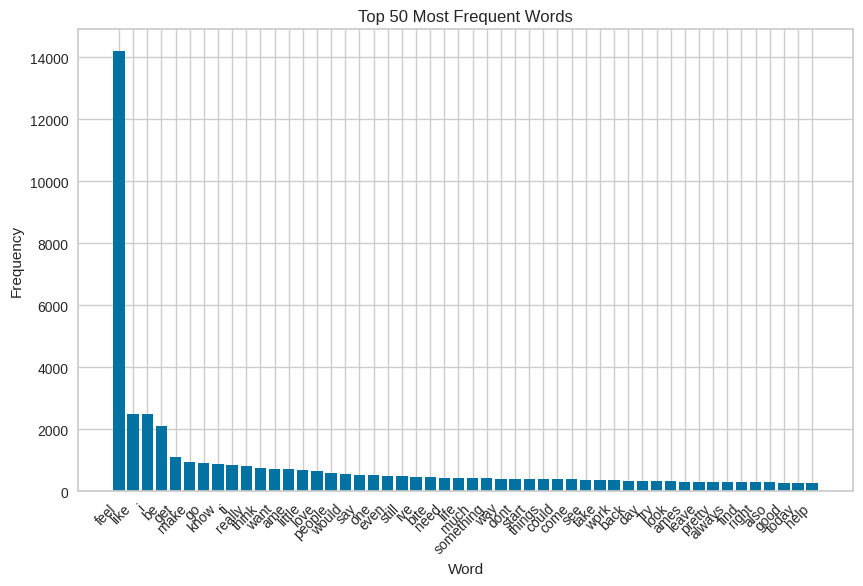

In [22]:
# Create a bar plot of the top 50 most frequent words
plt.figure(figsize=(10, 6))
plt.bar(top_words[:50], word_counts[:50])
plt.title('Top 50 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

> In this process, it can be seen that the most frequently occurring word is "feel." This may be due to the fact that stopword removal was previously performed using the default stopwords from nltk. In the plot above, the 50 most frequently occurring words can be seen.

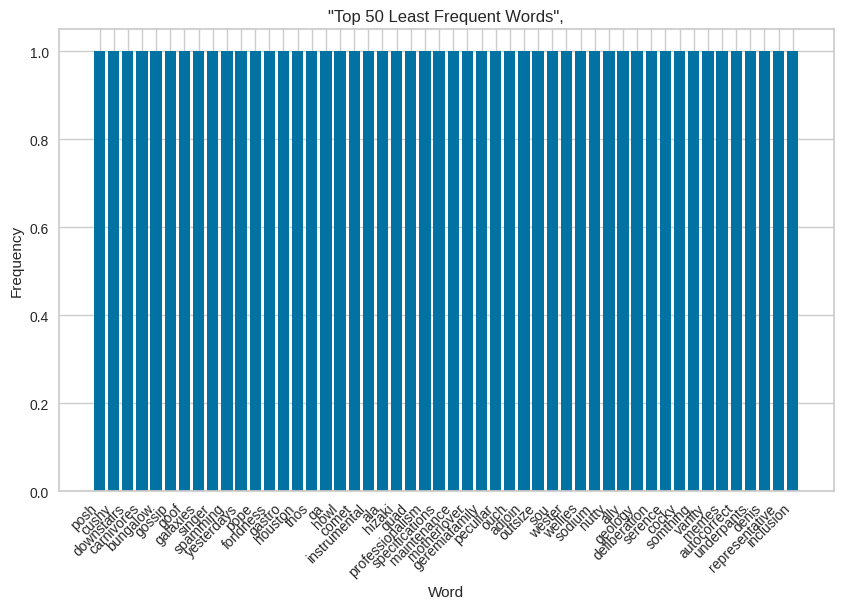

In [23]:
# Create a bar plot of the "Top 50 Least Frequent Words",
plt.figure(figsize=(10, 6))
plt.bar(top_words[-50:], word_counts[-50:])
plt.title('"Top 50 Least Frequent Words",')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

> For the 50 least occurring words, they only appear once, resulting in an evenly distributed plot.

In [24]:
# Define Stopwords

## Load Stopwords from NLTK

stop_words_en = stopwords.words("english")

print('Stopwords from NLTK')
print(len(stop_words_en), stop_words_en)
print('')

## Create A New Stopwords
new_stop_words = word_df['word'].head(100).unique()

## Merge Stopwords
stop_words_en = stop_words_en + list(set(new_stop_words) - set(stop_words_en))
print('Out Final Stopwords')
print(len(stop_words_en), stop_words_en)

Stopwords from NLTK
179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',

## Encode emotion to Label

In [25]:
# "Converting the target from string to numeric."

df_fix['label'] = df_fix['emotion'].replace({'sadness':0, 'joy':1, 'fear':2, 'anger':3, 'love':4, 'surprise':5})
df_fix

text   emotion  \
0                        i hate this feeling of helpless   sadness   
1      i really wanna see her soon but i feel really ...   sadness   
2      i was still feeling terrible sore throat body ...   sadness   
3      i feel like ive had to fake my feelings a lot ...   sadness   
4      i didnt feel any real emotional connection thi...   sadness   
...                                                  ...       ...   
13406  i feel funny inside is that a reference to the...  surprise   
13407  i almost feel funny not adding a picture at th...  surprise   
13408                  im just feeling so dazed everyday  surprise   
13409  i as representative of everything thats wrong ...  surprise   
13410  i feel i should make is how surprised but ente...  surprise   

                                       preprocessed_text  \
0                                  hate feeling helpless   
1      really wan na see soon feel really needy askin...   
2      still feeling terrible sore throat body aches ...   
3      feel like ive fake feelings lot often would liked   
4      didnt feel real emotional connection much char...   
...                                                  ...   
13406  feel funny inside reference circus going under...   
13407  almost feel funny adding picture bottom post l...   
13408                          im feeling dazed everyday   
13409  representative everything thats wrong corporat...   
13410  feel make surprised entertained inclusion many...   

                                                  tokens  num_tokens  \
0                              [hate, feeling, helpless]         3.0   
1      [really, wan, na, see, soon, feel, really, nee...        10.0   
2      [still, feeling, terrible, sore, throat, body,...        11.0   
3      [feel, like, ive, fake, feelings, lot, often, ...         9.0   
4      [didnt, feel, real, emotional, connection, muc...         9.0   
...                                                  ...         ...   
13406  [feel, funny, inside, reference, circus, going...         7.0   
13407  [almost, feel, funny, adding, picture, bottom,...        10.0   
13408                     [im, feeling, dazed, everyday]         4.0   
13409  [representative, everything, thats, wrong, cor...        11.0   
13410  [feel, make, surprised, entertained, inclusion...        13.0   

                                                   lemma  num_lemmas  \
0                                 [hate, feel, helpless]           3   
1      [really, wan, na, see, soon, feel, really, nee...          10   
2      [still, feel, terrible, sore, throat, body, ac...          11   
3      [feel, like, ive, fake, feel, lot, often, woul...           9   
4      [didnt, feel, real, emotional, connection, muc...           9   
...                                                  ...         ...   
13406  [feel, funny, inside, reference, circus, go, u...           7   
13407  [almost, feel, funny, add, picture, bottom, po...          10   
13408                      [i, be, feel, daze, everyday]           5   
13409  [representative, everything, thats, wrong, cor...          11   
13410  [feel, make, surprise, entertain, inclusion, m...          13   

                                           joined_lemmas  label  
0                                     hate feel helpless      0  
1       really wan na see soon feel really needy ask see      0  
2      still feel terrible sore throat body ache stuf...      0  
3           feel like ive fake feel lot often would like      0  
4      didnt feel real emotional connection much char...      0  
...                                                  ...    ...  
13406   feel funny inside reference circus go underpants      5  
13407  almost feel funny add picture bottom post like...      5  
13408                            i be feel daze everyday      5  
13409  representative everything thats wrong corporat...      5  
13410  feel make surprise entertai

---
# ⚙️Preprocessing

---

In [26]:
# "Splitting variables X and Y."
X=df_fix.joined_lemmas
y= df_fix.label

In [27]:
# Splitting Corpus
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.69, random_state=1, stratify=y)
## split XY train-test
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.69, random_state=11, stratify=y)
## split XY train-validation

In [28]:
# Convert String into Numerical
# Remove stop words from text data
stop_words_en = 'english'
count_vect_sw = CountVectorizer(stop_words=stop_words_en)

count_vect_sw.fit(X_train)
X_train_count_vect_sw = count_vect_sw.transform(X_train)
X_val_count_vect_sw = count_vect_sw.transform(X_val)
X_test_count_vect_sw = count_vect_sw.transform(X_test)

max_tokens = len(count_vect_sw.vocabulary_)
maxlen= max([len(i.split(" ")) for i in X_train])
# Print vocabulary size
print("Vocabulary size:", max_tokens)
print("Maximum sentence length : ", maxlen, "word")

Vocabulary size: 9021
Maximum sentence length :  36 word


CountVectorizer:
CountVectorizer is a text vectorization technique in natural language processing (NLP) that converts a collection of text documents into a matrix of token counts. It is a bag-of-words model, which means that it ignores the order and context of the words in the document and only considers their frequency.

The CountVectorizer process typically involves the following steps:

    Tokenization: The text data is split into individual words or tokens.

    Vocabulary Creation: A unique vocabulary of all the tokens in the text corpus is created, and each token is assigned an integer index.

    Counting: For each document in the corpus, the frequency of each token in the vocabulary is counted and recorded in a sparse matrix.

The resulting matrix has one row for each document in the corpus and one column for each unique token in the vocabulary. The values in the matrix represent the frequency of each token in each document. This matrix can then be used as input to machine learning models, such as classification or clustering algorithms.

CountVectorizer is a simple and effective technique for text vectorization, and it is widely used in NLP applications. However, it has some limitations, such as the inability to capture the meaning or context of the words in the document. To overcome this limitation, other techniques such as TF-IDF or word embeddings can be used.

In [29]:
# Text Vectorization
text_vectorization = TextVectorization(max_tokens=max_tokens,
                                       split="whitespace",
                                       ngrams=3,
                                       output_mode="int",
                                       output_sequence_length=15,
                                       input_shape=(1,)
                                       )
text_vectorization.adapt(X_train)

text vectorization: 
> The TextVectorization process typically involves several steps. First, the text data is tokenized, which means it is split into individual words or subwords. Next, the tokenizer converts these tokens into integers, based on a mapping between each unique token and an integer value. This process is sometimes referred to as "indexing" the tokens.

> After the tokens have been indexed, the TextVectorization step converts them into vectors. This is typically done using one of several techniques, such as one-hot encoding or word embeddings. One-hot encoding involves creating a binary vector for each token, where each element of the vector corresponds to a possible value of the integer index. Word embeddings, on the other hand, involve representing each token as a dense vector of continuous values, based on the context in which it appears in the text.

> Once the text data has been converted into vectors, it can be used as input to machine learning models. TextVectorization can help improve the accuracy of these models by capturing the meaning and context of the text data, making it easier for the models to identify patterns and relationships in the data.

In [30]:
# Embedding
embedding = Embedding(input_dim=max_tokens,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=15
                      )

word embedding: 
> Word embeddings are usually learned by training a neural network on a large corpus of text data, such as Wikipedia or news articles. During training, the neural network learns to predict the context of a word, given its surrounding words. This process results in each word being represented by a high-dimensional vector, typically with hundreds of dimensions.

> Embeddings can be used in a variety of NLP tasks, such as text classification, sentiment analysis, and machine translation. By using embeddings, machine learning models can better capture the meaning and context of words, leading to more accurate results.

In [31]:
early_stop = EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights= True)

# 🎯 Modeling

In [32]:
# Converting the target into One Hot Encoding.
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [33]:
#Creating a TensorFlow pipeline for training, validation, and test data
train_pipe_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train_ohe)).batch(64).repeat(3)
val_pipe_tf   = tf.data.Dataset.from_tensor_slices((X_val, y_val_ohe)).batch(64)
test_pipe_tf  = tf.data.Dataset.from_tensor_slices((X_test, y_test_ohe)).batch(64)

## Sequential LSTM 

### Model

In [34]:
# Model training using Dense Layers
model1 = Sequential()
model1.add(text_vectorization)
model1.add(embedding)
model1.add(LSTM(units=64))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(6, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1154688   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 1,206,374
Trainable params: 1,206,374
Non-trainable params: 0
______________________________________________

The designed model architecture consists of several layers, which are:

    TextVectorization layer: This layer is responsible for converting input text into numerical vectors, which will then be processed by the next layer.

    Embedding layer: This layer is responsible for converting the numerical vectors from text vectorization into embedding vectors. These embedding vectors can represent the meaning and relationships between words in the input text.

    LSTM layer: This layer is one type of recurrent layer that can handle sequential inputs. The LSTM layer is used to process the embedding vectors sequentially and generate output at each time step.

    Dense layer: This layer is a fully connected layer that is responsible for processing the output from the LSTM layer. In this model, there are 2 dense layers. The first dense layer has 32 neurons with a relu activation function, while the second dense layer has 6 neurons with a softmax activation function.

In this model, there are a total of 1,206,374 trainable parameters. The model is compiled using categorical crossentropy as the loss function and adam as the optimizer. The metric used for evaluating the model is accuracy.

- The first line creates a Sequential object, which is a container for the layers in the model.
- The next line adds a layer for text vectorization. This layer will preprocess the input text data by tokenizing the text, converting it to lowercase, and removing stopwords and other non-alphanumeric characters.
- The third line adds an embedding layer, which maps the tokenized words into dense vectors of fixed size. This layer is often used in natural language processing tasks to learn the meaning and context of words in the text.
- The fourth line adds an LSTM layer with 64 units. LSTM stands for Long Short-Term Memory, which is a type of recurrent neural network that can remember long-term dependencies in the input sequence.
- The fifth line adds a dense layer with 32 units and ReLU activation function. Dense layers are fully connected layers where each neuron in the layer is connected to every neuron in the previous layer. ReLU is a popular activation function that introduces non-linearity to the network.
- The sixth line adds a dense layer with 6 units and a softmax activation function. This layer is the output layer that produces the final predictions for the 6-class classification problem.
- The seventh line compiles the model by specifying the loss function, optimizer, and evaluation metric to use during training.

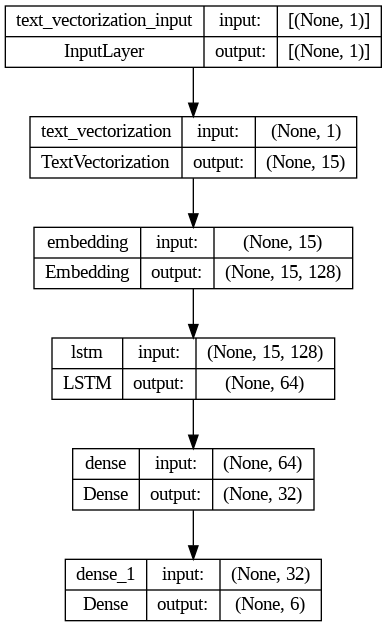

In [35]:
#plot model sequential
tf.keras.utils.plot_model(model1, show_shapes=True)

### Training

In [36]:
%%time

# Train the model
history = model1.fit(train_pipe_tf, epochs=50, validation_data=val_pipe_tf,callbacks= early_stop)

Epoch 1/50
435/435 [==============================] - 28s 56ms/step - loss: 0.8210 - accuracy: 0.6672 - val_loss: 0.6758 - val_accuracy: 0.8158
Epoch 2/50
435/435 [==============================] - 23s 52ms/step - loss: 0.1055 - accuracy: 0.9676 - val_loss: 0.7785 - val_accuracy: 0.8155
Epoch 3/50
435/435 [==============================] - 21s 47ms/step - loss: 0.0465 - accuracy: 0.9862 - val_loss: 0.8304 - val_accuracy: 0.8172
Epoch 4/50
435/435 [==============================] - 24s 55ms/step - loss: 0.0239 - accuracy: 0.9928 - val_loss: 1.0378 - val_accuracy: 0.8175
Epoch 5/50
435/435 [==============================] - 21s 48ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 1.0319 - val_accuracy: 0.8240
Epoch 6/50
435/435 [==============================] - 23s 54ms/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 1.1440 - val_accuracy: 0.8177
CPU times: user 2min 55s, sys: 11.3 s, total: 3min 7s
Wall time: 3min 14s


> In the above training, it was completed in 3 minutes and 14 seconds with a training data accuracy of 0.9936 and a validation data accuracy of 0.8177. It is indicated that there is overfitting with a vanishing form. However, because the difference is not more than 20% and the number of data is unbalanced, it will be difficult to obtain a good fit value. These results are already quite good in predicting data.

### Evaluation

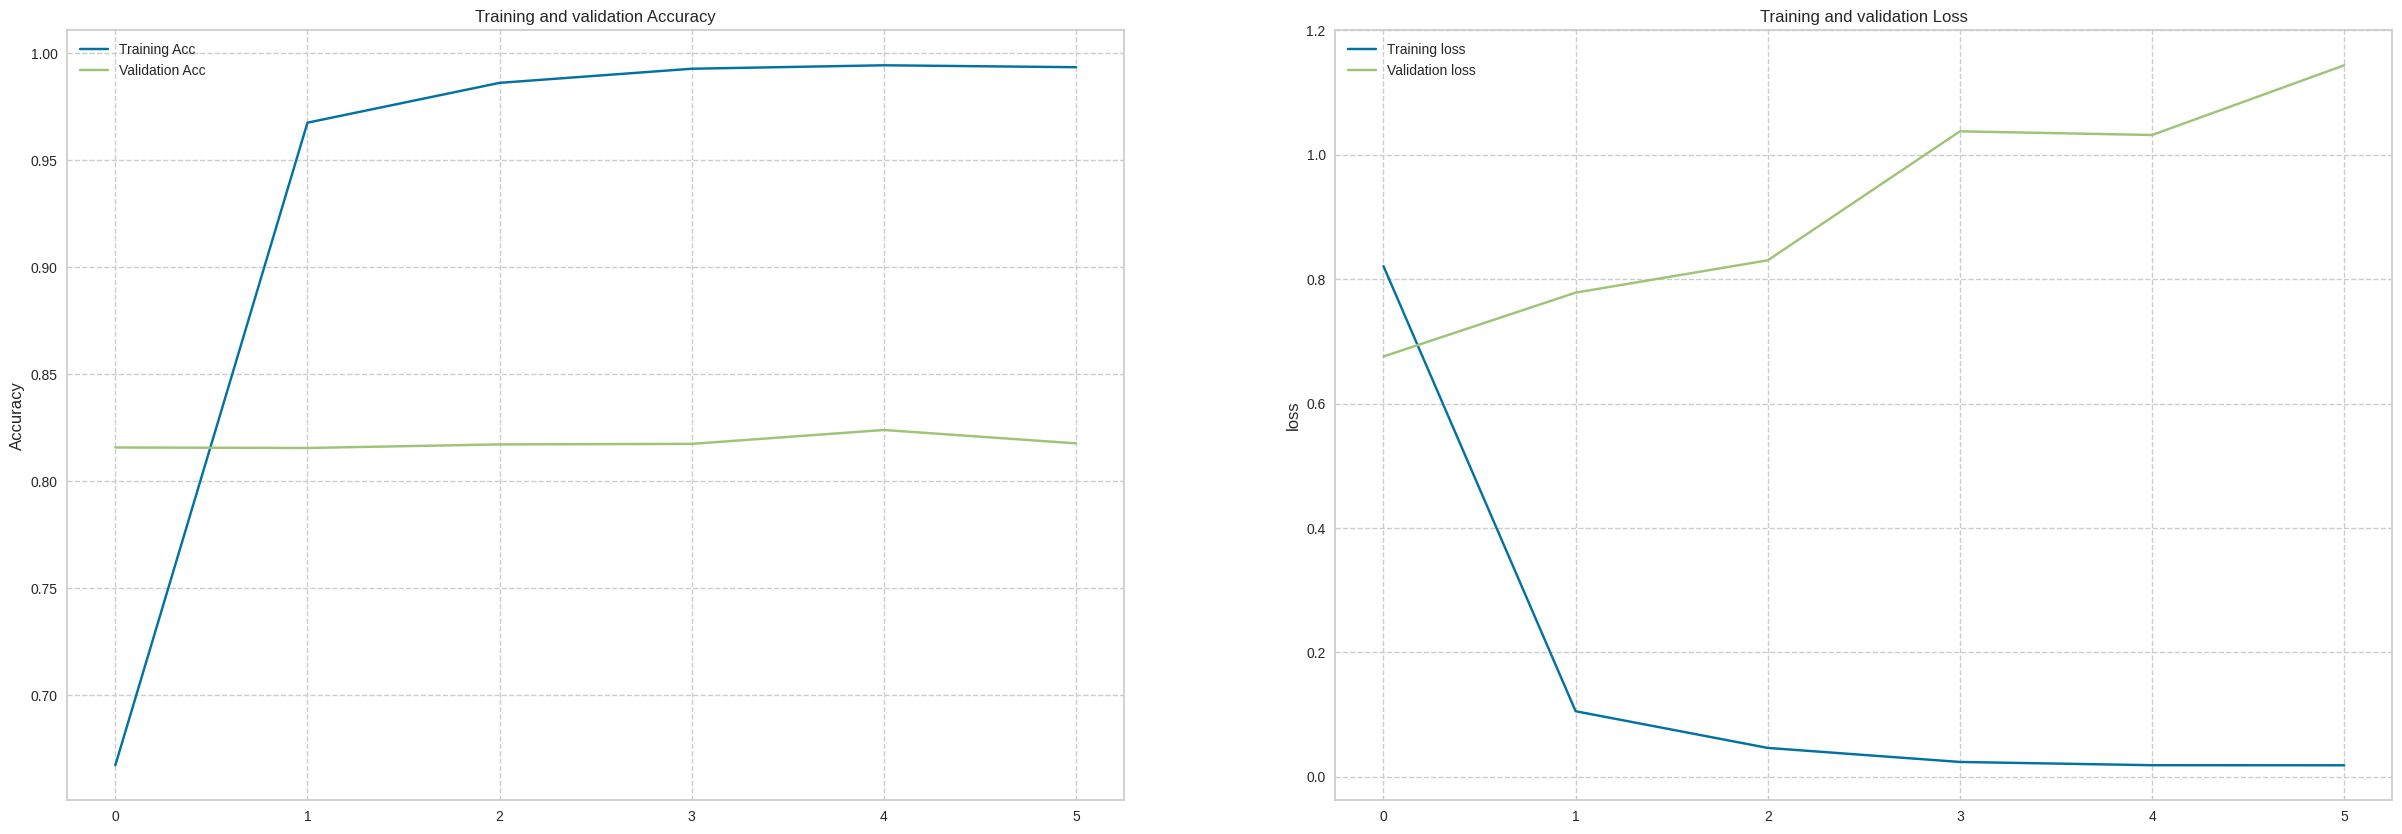

In [37]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [38]:
#evaluation

y_pred_seq1 = model1.predict(X_test)
y_pred_seq1 = np.where(y_pred_seq1 >=0.5, 1, 0)
print(classification_report(y_test_ohe.argmax(axis=1), y_pred_seq1.argmax(axis=1)))

130/130 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       930
           1       0.95      0.89      0.92       930
           2       0.91      0.87      0.89       734
           3       0.97      0.89      0.93       838
           4       0.92      0.86      0.89       505
           5       0.88      0.90      0.89       221

    accuracy                           0.90      4158
   macro avg       0.91      0.90      0.90      4158
weighted avg       0.91      0.90      0.90      4158



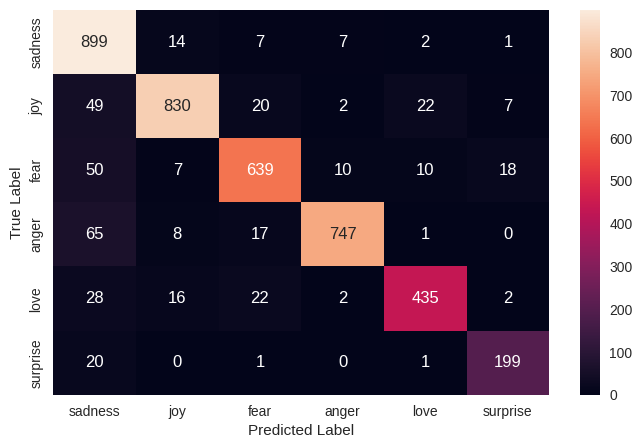

In [39]:
# Define the label dictionary
label_dict = {'sadness': 0, 'joy': 1, 'fear': 2, 'anger': 3, 'love': 4, 'surprise': 5}

# Create the confusion matrix using the label dictionary
cm_seq = tf.math.confusion_matrix(labels=y_test_ohe.argmax(axis=1), predictions=y_pred_seq1.argmax(axis=1))
plt.figure(figsize=(8, 5))
sns.heatmap(cm_seq, annot=True, fmt='d', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> The result above shows the classification report for a model's performance on a dataset with six classes (labels) including 'sadness', 'joy', 'fear', 'anger', 'love', and 'surprise'. The precision, recall, and f1-score values are reported for each class.

> The precision for a class measures the percentage of correct positive predictions out of all positive predictions made for that class. The recall measures the percentage of true positive predictions out of all actual positives for that class. The f1-score is the harmonic mean of precision and recall.

> The weighted average of precision, recall, and f1-score reported in the last row of the table represents the overall performance of the model across all classes, taking into account the class imbalance.

> The macro average of precision, recall, and f1-score reported in the second last row of the table represents the unweighted average of precision, recall, and f1-score across all classes.

> Overall, the model achieves a good performance with an accuracy of 0.9, but the precision, recall, and f1-score values for each class differ. The model performs well in predicting 'joy', 'anger', and 'surprise', with f1-scores of 0.92, 0.93, and 0.89, respectively. However, the model has a lower f1-score for predicting 'love' and 'fear', with f1-scores of 0.89 and 0.89, respectively.

## Sequential GRU

### Model

In [66]:
# Model training using Dense Layers
model2 = Sequential()
model2.add(text_vectorization)
model2.add(embedding)
model2.add(GRU(units=64))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1154688   
                                                                 
 gru_4 (GRU)                 (None, 64)                37248     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 6)                 198       
                                                                 
Total params: 1,194,214
Trainable params: 1,194,214
Non-trainable params: 0
____________________________________________

The designed model architecture consists of several layers, which are:

    TextVectorization layer: This layer is responsible for converting input text into numerical vectors, which will then be processed by the next layer.

    Embedding layer: This layer is responsible for converting the numerical vectors from text vectorization into embedding vectors. These embedding vectors can represent the meaning and relationships between words in the input text.

    GRU layer: This layer is one type of recurrent layer that can handle sequential inputs. The GRU layer is used to process the embedding vectors sequentially and generate output at each time step.

    Dense layer: This layer is a fully connected layer that is responsible for processing the output from the GRU layer. In this model, there are 2 dense layers. The first dense layer has 32 neurons with a relu activation function, while the second dense layer has 6 neurons with a softmax activation function.

In this model, there are a total of 1,194,214 trainable parameters. The model is compiled using categorical crossentropy as the loss function and adam as the optimizer. The metric used for evaluating the model is accuracy.

- The first line creates a Sequential object, which is a container for the layers in the model.
- The next line adds a layer for text vectorization, which will preprocess the input text data.
- The third line adds an embedding layer, which will map the tokenized words into dense vectors of fixed size.
- The fourth line adds a GRU layer with 64 units and return_sequences=True. GRU stands for Gated Recurrent Unit, which is a type of recurrent neural network similar to LSTM but with fewer parameters.
- The fifth line adds a Bidirectional layer that wraps a GRU layer with 128 units and return_sequences=True. Bidirectional layers are often used in natural language processing tasks to capture the context from both forward and backward directions.
- The sixth line adds a Dropout layer with a rate of 0.2, which will randomly drop out some neurons during training to reduce overfitting.
- The seventh line adds another Bidirectional layer that wraps a GRU layer with 64 units.
- The eighth line adds another Dropout layer with a rate of 0.2.
- The ninth line adds a dense layer with 32 units and ReLU activation function.
- The tenth line adds a dense layer with 6 units and softmax activation function, which is the output layer that produces the final predictions for the 6-class classification problem.
- The eleventh line defines a learning rate schedule function that decreases the learning rate as the training progresses.
- The twelfth line creates a LearningRateScheduler object that will use the defined learning rate schedule function.
- The thirteenth line compiles the model by specifying the loss function, optimizer, and evaluation metric to use during training.

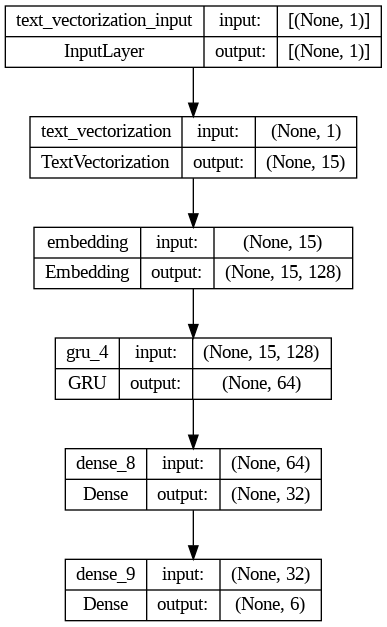

In [67]:
#plot model sequential
tf.keras.utils.plot_model(model2, show_shapes=True)

### Training

In [68]:
%%time
# Train the model
history2 = model2.fit(train_pipe_tf, epochs=50, validation_data=val_pipe_tf,callbacks= early_stop)


Epoch 1/50
435/435 [==============================] - 25s 50ms/step - loss: 0.3154 - accuracy: 0.8863 - val_loss: 0.9413 - val_accuracy: 0.7958
Epoch 2/50
435/435 [==============================] - 21s 48ms/step - loss: 0.0369 - accuracy: 0.9899 - val_loss: 1.0239 - val_accuracy: 0.8098
Epoch 3/50
435/435 [==============================] - 25s 57ms/step - loss: 0.0177 - accuracy: 0.9955 - val_loss: 1.1011 - val_accuracy: 0.8093
Epoch 4/50
435/435 [==============================] - 35s 81ms/step - loss: 0.0119 - accuracy: 0.9968 - val_loss: 1.1880 - val_accuracy: 0.8030
Epoch 5/50
435/435 [==============================] - 28s 65ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 1.1278 - val_accuracy: 0.8208
Epoch 6/50
435/435 [==============================] - 22s 50ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 1.1972 - val_accuracy: 0.8170
CPU times: user 2min 54s, sys: 7.9 s, total: 3min 2s
Wall time: 2min 48s


### Evaluation

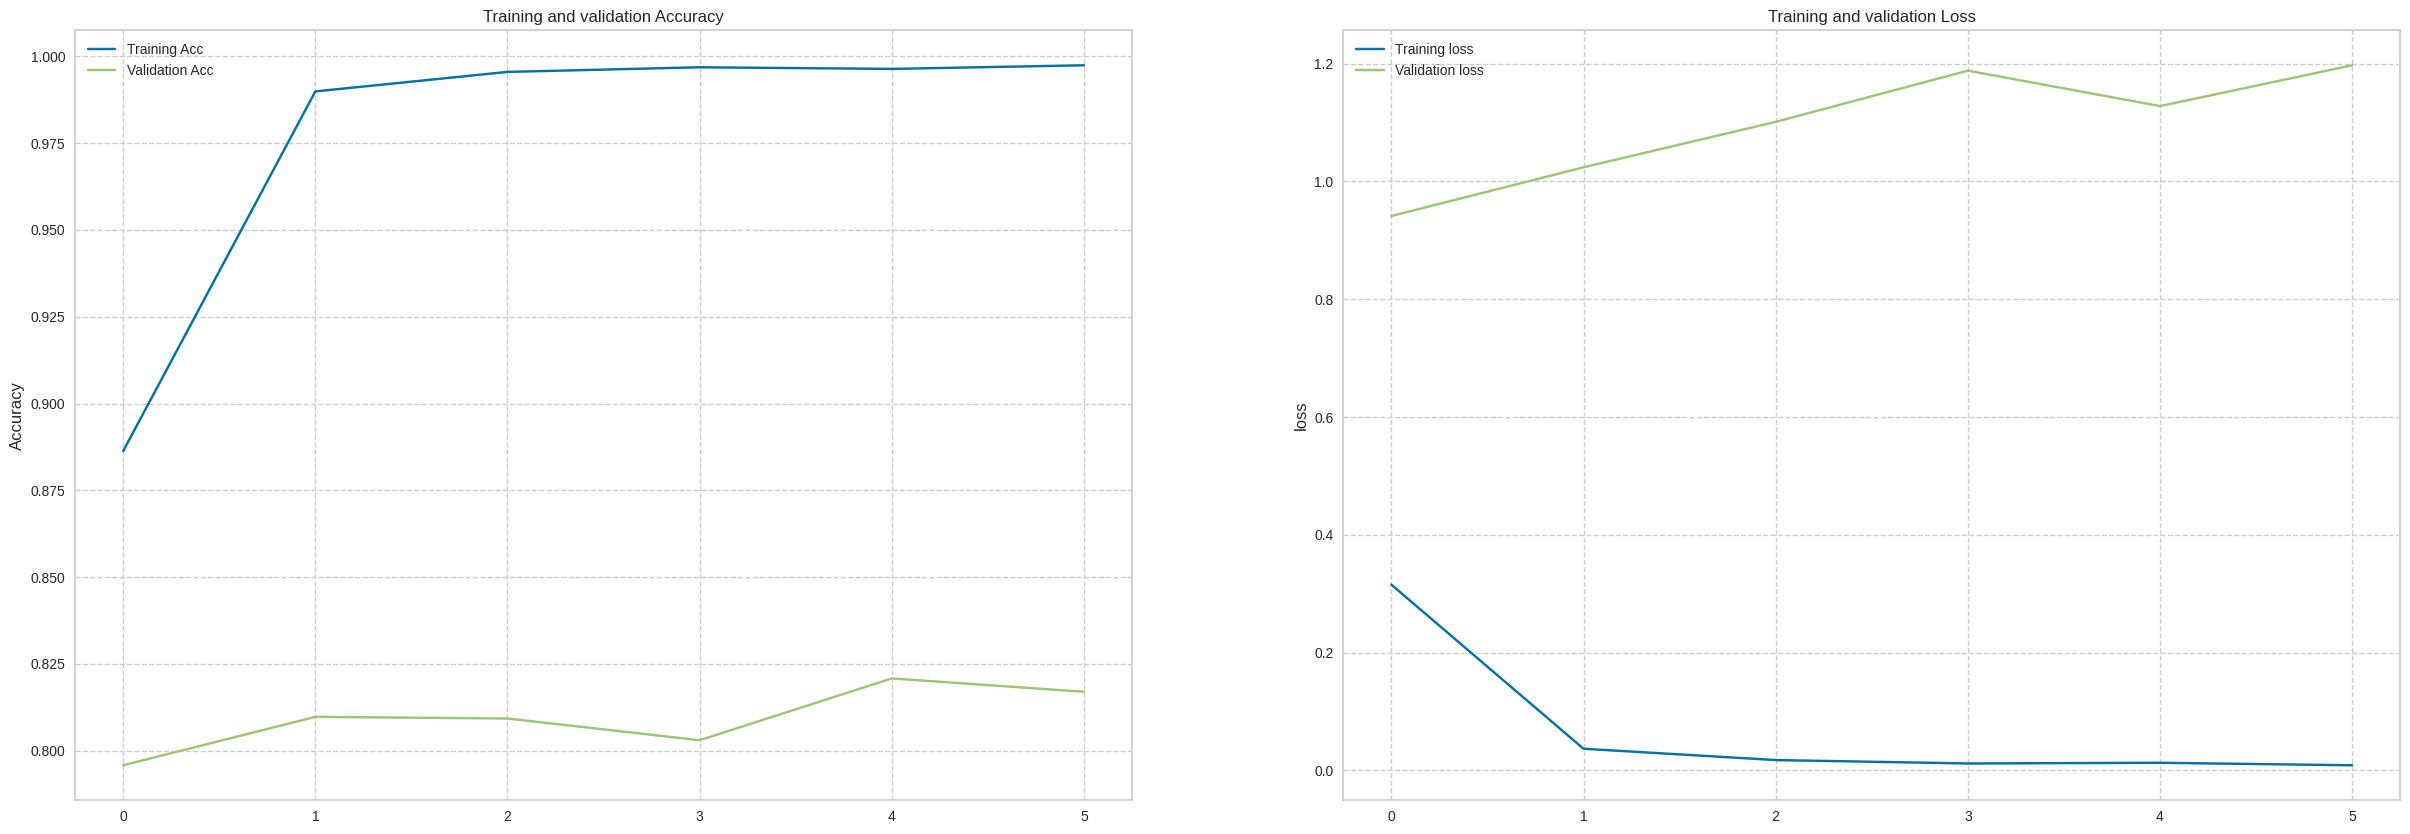

In [69]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history2.history['accuracy'], label='Training Acc')
plt.plot(history2.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [70]:

y_pred_seq2 = model2.predict(X_test)
y_pred_seq2 = np.where(y_pred_seq2 >=0.5, 1, 0)
print(classification_report(y_test_ohe.argmax(axis=1), y_pred_seq2.argmax(axis=1)))

130/130 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       930
           1       0.96      0.90      0.93       930
           2       0.96      0.91      0.93       734
           3       0.95      0.94      0.95       838
           4       0.93      0.90      0.91       505
           5       0.90      0.95      0.92       221

    accuracy                           0.93      4158
   macro avg       0.93      0.93      0.93      4158
weighted avg       0.93      0.93      0.93      4158



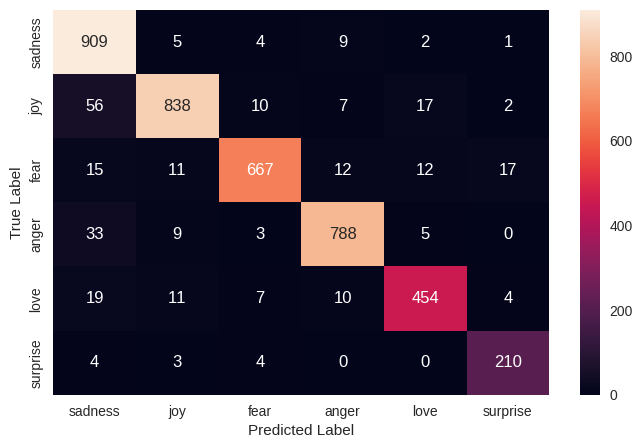

In [71]:
# Define the label dictionary
label_dict = {'sadness': 0, 'joy': 1, 'fear': 2, 'anger': 3, 'love': 4, 'surprise': 5}

# Create the confusion matrix using the label dictionary
cm_seq = tf.math.confusion_matrix(labels=y_test_ohe.argmax(axis=1), predictions=y_pred_seq2.argmax(axis=1))
plt.figure(figsize=(8, 5))
sns.heatmap(cm_seq, annot=True, fmt='d', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> The result above shows the classification report for a model's performance on a dataset with six classes (labels) including 'sadness', 'joy', 'fear', 'anger', 'love', and 'surprise'. The precision, recall, and f1-score values are reported for each class.

> The precision for a class measures the percentage of correct positive predictions out of all positive predictions made for that class. The recall measures the percentage of true positive predictions out of all actual positives for that class. The f1-score is the harmonic mean of precision and recall.

> The weighted average of precision, recall, and f1-score reported in the last row of the table represents the overall performance of the model across all classes, taking into account the class imbalance.

> The macro average of precision, recall, and f1-score reported in the second last row of the table represents the unweighted average of precision, recall, and f1-score across all classes.

> Overall, the model achieves a very good performance with an accuracy of 0.93. The precision, recall, and f1-score values for each class are very high, indicating that the model performs well in predicting all six classes. The model has the highest f1-scores for predicting 'anger' and 'fear', with f1-scores of 0.95 and 0.93, respectively. The model also performs well in predicting 'joy' and 'love', with f1-scores of 0.93 and 0.91, respectively. The model has a slightly lower f1-score for predicting 'surprise', with an f1-score of 0.92.

## Functional API LSTM

### Model

In [46]:
inputs = Input(shape=(1,), dtype=tf.string)
x = text_vectorization(inputs)
x = embedding(x)
x = LSTM(units=64)(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(6, activation='softmax')(x)

model_api = Model(inputs=inputs, outputs=outputs)
model_api.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_api.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1154688   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 6)                 198       
                                                             

The designed model architecture consists of several layers, which are:

    TextVectorization layer: This layer is responsible for converting input text into numerical vectors, which will then be processed by the next layer.

    Embedding layer: This layer is responsible for converting the numerical vectors from text vectorization into embedding vectors. These embedding vectors can represent the meaning and relationships between words in the input text.

    LSTM layer: This layer is one type of recurrent layer that can handle sequential inputs. The LSTM layer is used to process the embedding vectors sequentially and generate output at each time step.

    Dense layer: This layer is a fully connected layer that is responsible for processing the output from the LSTM layer. In this model, there are 2 dense layers. The first dense layer has 32 neurons with a relu activation function, while the second dense layer has 6 neurons with a softmax activation function.

In this model, there are a total of 1,206,374 trainable parameters. The model is compiled using categorical crossentropy as the loss function and adam as the optimizer. The metric used for evaluating the model is accuracy.

- The first line creates an Input object that defines the input shape and data type. In this case, the input is a string of text data.
- The second line applies the text vectorization layer to the input, which converts the string input to a tensor of integers.
- The third line adds an embedding layer that maps the tokenized integers to dense vectors of fixed size.
- The fourth line adds an LSTM layer with 64 units, which is a type of recurrent neural network that is good at capturing long-term dependencies in sequential data.
- The fifth line adds a dense layer with 32 units and ReLU activation function.
- The sixth line adds another dense layer with 6 units and softmax activation function, which is the output layer that produces the final predictions for the 6-class classification problem.
- The seventh line creates a Model object that takes the input and output layers as arguments.
- The eighth line compiles the model by specifying the loss function, optimizer, and evaluation metric to use during training.

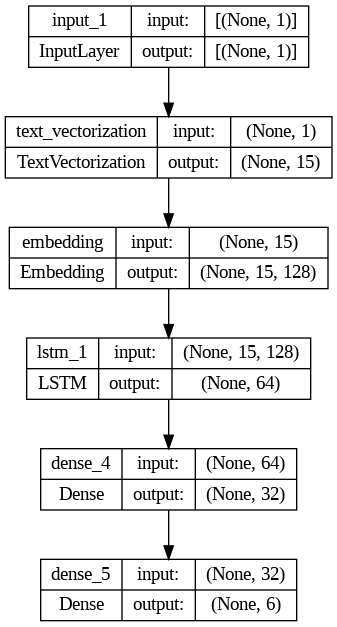

In [47]:
#plot model Funtional API
tf.keras.utils.plot_model(model_api, show_shapes=True)

### Training

In [48]:
%%time
history_API = model_api.fit(train_pipe_tf, epochs=50, validation_data=val_pipe_tf,callbacks= early_stop)


Epoch 1/50
435/435 [==============================] - 27s 56ms/step - loss: 0.3633 - accuracy: 0.8721 - val_loss: 0.7361 - val_accuracy: 0.8098
Epoch 2/50
435/435 [==============================] - 21s 47ms/step - loss: 0.0576 - accuracy: 0.9835 - val_loss: 0.8746 - val_accuracy: 0.8090
Epoch 3/50
435/435 [==============================] - 20s 45ms/step - loss: 0.0276 - accuracy: 0.9922 - val_loss: 0.9932 - val_accuracy: 0.8151
Epoch 4/50
435/435 [==============================] - 22s 50ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 1.0444 - val_accuracy: 0.8165
Epoch 5/50
435/435 [==============================] - 22s 50ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 1.0342 - val_accuracy: 0.8189
Epoch 6/50
435/435 [==============================] - 21s 48ms/step - loss: 0.0145 - accuracy: 0.9949 - val_loss: 1.1428 - val_accuracy: 0.8167
CPU times: user 2min 54s, sys: 7.72 s, total: 3min 2s
Wall time: 2min 12s


### Evaluation

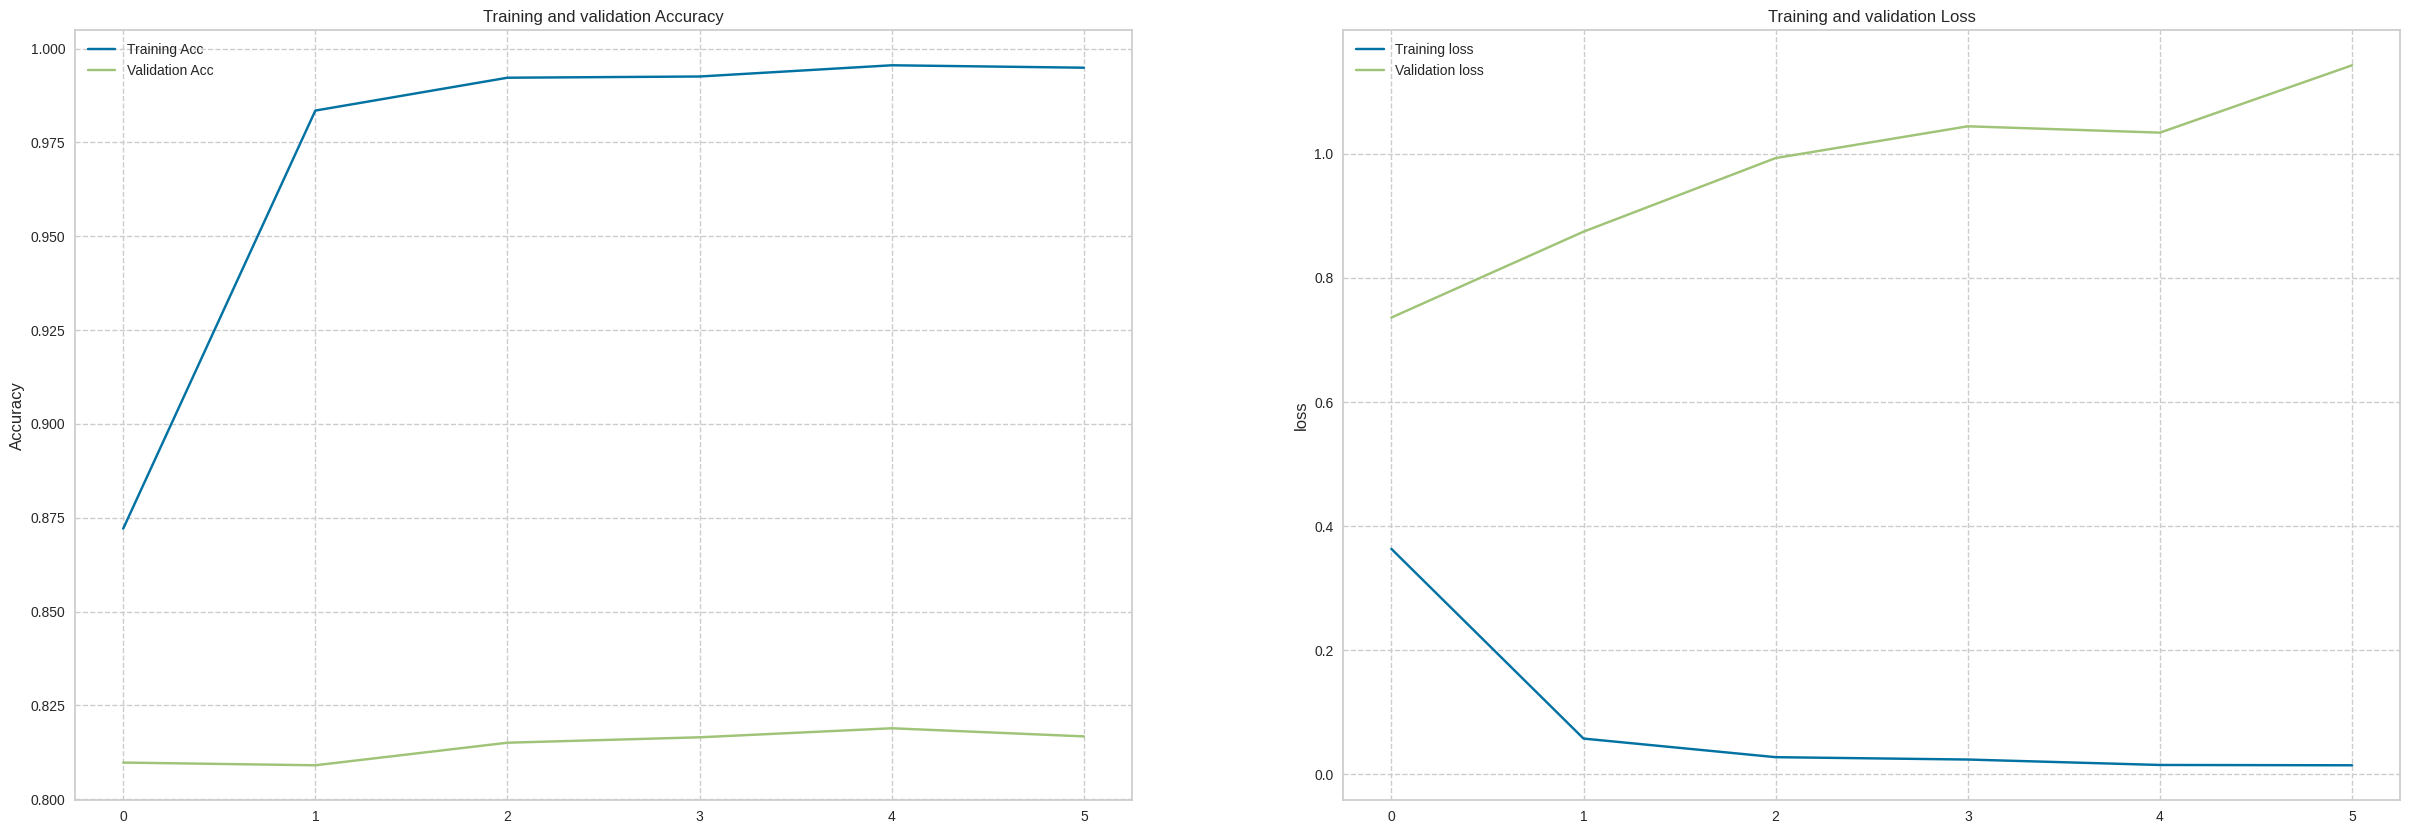

In [49]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_API.history['accuracy'], label='Training Acc')
plt.plot(history_API.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_API.history['loss'], label='Training loss')
plt.plot(history_API.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [50]:
y_pred_api = model_api.predict(X_test)
y_pred_api = np.where(y_pred_api >=0.5, 1, 0)
print(classification_report(y_test_ohe.argmax(axis=1), y_pred_api.argmax(axis=1)))

130/130 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       930
           1       0.95      0.90      0.93       930
           2       0.93      0.90      0.92       734
           3       0.97      0.94      0.95       838
           4       0.93      0.90      0.91       505
           5       0.86      0.94      0.90       221

    accuracy                           0.93      4158
   macro avg       0.92      0.93      0.92      4158
weighted avg       0.93      0.93      0.93      4158



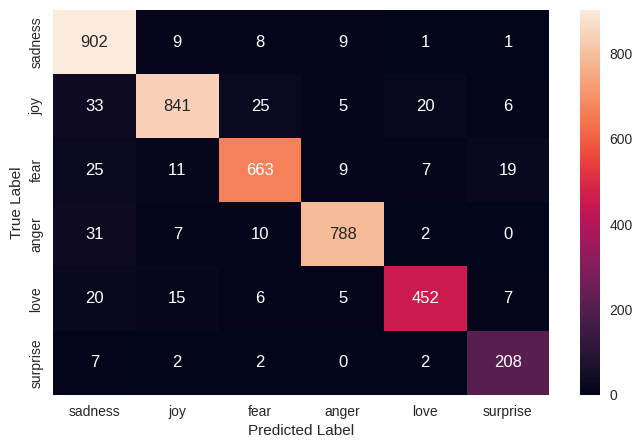

In [51]:
# Define the label dictionary
label_dict = {'sadness': 0, 'joy': 1, 'fear': 2, 'anger': 3, 'love': 4, 'surprise': 5}

# Create the confusion matrix using the label dictionary
cm_seq = tf.math.confusion_matrix(labels=y_test_ohe.argmax(axis=1), predictions=y_pred_api.argmax(axis=1))
plt.figure(figsize=(8, 5))
sns.heatmap(cm_seq, annot=True, fmt='d', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> The result above shows the classification report for a model's performance on a dataset with six classes (labels) including 'sadness', 'joy', 'fear', 'anger', 'love', and 'surprise'. The precision, recall, and f1-score values are reported for each class.

> The precision for a class measures the percentage of correct positive predictions out of all positive predictions made for that class. The recall measures the percentage of true positive predictions out of all actual positives for that class. The f1-score is the harmonic mean of precision and recall.

> The weighted average of precision, recall, and f1-score reported in the last row of the table represents the overall performance of the model across all classes, taking into account the class imbalance.

> The macro average of precision, recall, and f1-score reported in the second last row of the table represents the unweighted average of precision, recall, and f1-score across all classes.

> Overall, the model achieves a very good performance with an accuracy of 0.93. The precision, recall, and f1-score values for each class are high, indicating that the model performs well in predicting all six classes. The model has the highest f1-scores for predicting 'anger' and 'fear', with f1-scores of 0.95 and 0.92, respectively. The model also performs well in predicting 'joy', 'sadness', and 'love', with f1-scores of 0.93, 0.93, and 0.91, respectively. The model has a slightly lower f1-score for predicting 'surprise', with an f1-score of 0.90.

## Functional API GRU

### Model

In [52]:
inputs = Input(shape=(1,), dtype=tf.string)
x = text_vectorization(inputs)
x = embedding(x)
x = GRU(units=64)(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(6, activation='softmax')(x)

model_api2 = Model(inputs=inputs, outputs=outputs)
model_api2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_api2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1154688   
                                                                 
 gru_3 (GRU)                 (None, 64)                37248     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 6)                 198       
                                                           

The designed model architecture consists of several layers, which are:

    TextVectorization layer: This layer is responsible for converting input text into numerical vectors, which will then be processed by the next layer.

    Embedding layer: This layer is responsible for converting the numerical vectors from text vectorization into embedding vectors. These embedding vectors can represent the meaning and relationships between words in the input text.

    GRU layer: This layer is one type of recurrent layer that can handle sequential inputs. The GRU layer is used to process the embedding vectors sequentially and generate output at each time step.

    Dense layer: This layer is a fully connected layer that is responsible for processing the output from the GRU layer. In this model, there are 2 dense layers. The first dense layer has 32 neurons with a relu activation function, while the second dense layer has 6 neurons with a softmax activation function.

In this model, there are a total of 1,194,214 trainable parameters. The model is compiled using categorical crossentropy as the loss function and adam as the optimizer. The metric used for evaluating the model is accuracy.

- The first line creates an Input object that defines the input shape and data type. In this case, the input is a string of text data.
- The second line applies the text vectorization layer to the input, which converts the string input to a tensor of integers.
- The third line adds an embedding layer that maps the tokenized integers to dense vectors of fixed size.
- The fourth line adds a GRU layer with 64 units, which is a type of recurrent neural network that is similar to LSTM but has fewer parameters and can be faster to train.
- The fifth line adds a dense layer with 32 units and ReLU activation function.
- The sixth line adds another dense layer with 6 units and softmax activation function, which is the output layer that produces the final predictions for the 6-class classification problem.
- The seventh line creates a Model object that takes the input and output layers as arguments.
- The eighth line compiles the model by specifying the loss function, optimizer, and evaluation metric to use during training.

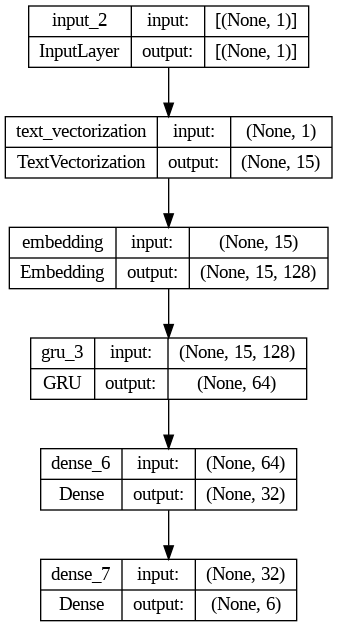

In [53]:
#plot model Funtional API
tf.keras.utils.plot_model(model_api2, show_shapes=True)

### Training

In [54]:
%%time
history_API2 = model_api2.fit(train_pipe_tf, epochs=50, validation_data=val_pipe_tf,callbacks= early_stop)


Epoch 1/50
435/435 [==============================] - 23s 46ms/step - loss: 0.3879 - accuracy: 0.8606 - val_loss: 0.8030 - val_accuracy: 0.8001
Epoch 2/50
435/435 [==============================] - 21s 49ms/step - loss: 0.0494 - accuracy: 0.9856 - val_loss: 0.9652 - val_accuracy: 0.7963
Epoch 3/50
435/435 [==============================] - 20s 47ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 1.0987 - val_accuracy: 0.8052
Epoch 4/50
435/435 [==============================] - 19s 44ms/step - loss: 0.0170 - accuracy: 0.9951 - val_loss: 1.1616 - val_accuracy: 0.8098
Epoch 5/50
435/435 [==============================] - 19s 44ms/step - loss: 0.0160 - accuracy: 0.9956 - val_loss: 1.1513 - val_accuracy: 0.8165
Epoch 6/50
435/435 [==============================] - 23s 52ms/step - loss: 0.0127 - accuracy: 0.9962 - val_loss: 1.0985 - val_accuracy: 0.8228
CPU times: user 2min 43s, sys: 7.91 s, total: 2min 51s
Wall time: 2min 8s


### Evaluation

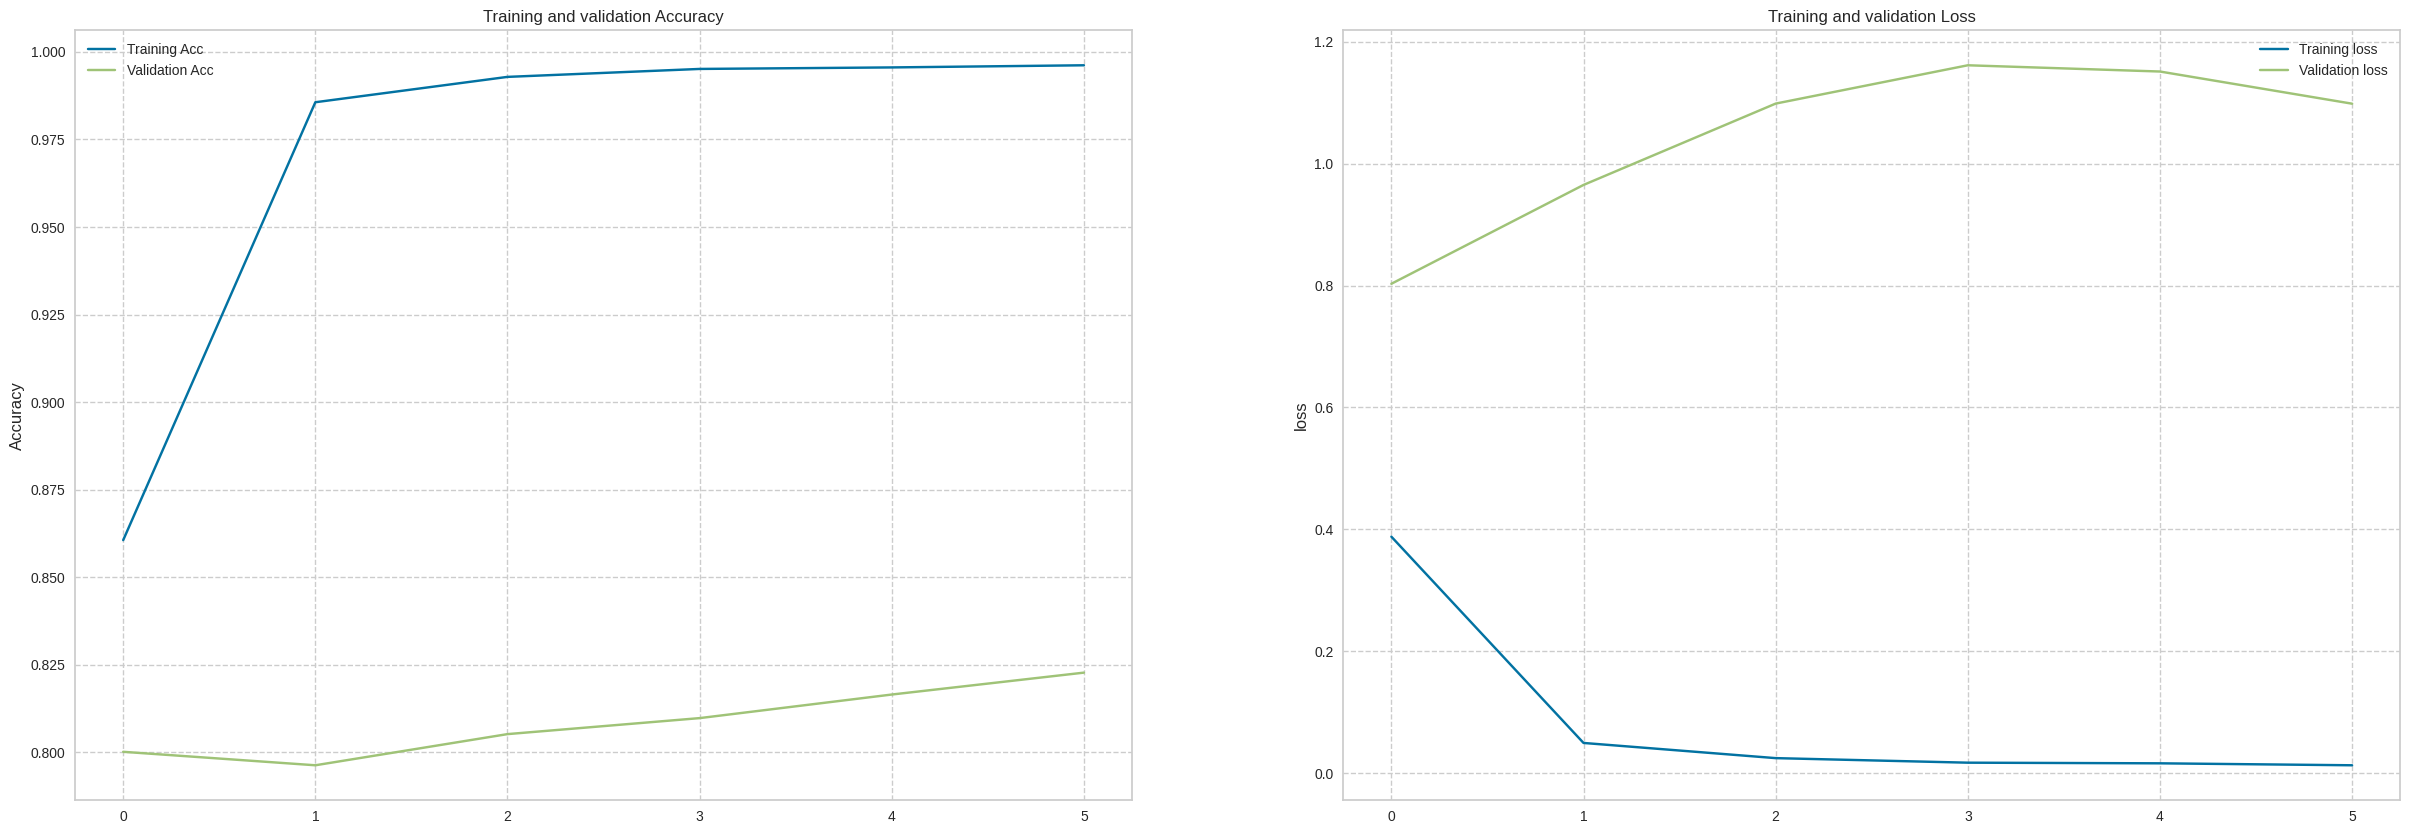

In [55]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_API2.history['accuracy'], label='Training Acc')
plt.plot(history_API2.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_API2.history['loss'], label='Training loss')
plt.plot(history_API2.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [56]:
y_pred_api2 = model_api2.predict(X_test)
y_pred_api2 = np.where(y_pred_api >=0.5, 1, 0)
print(classification_report(y_test_ohe.argmax(axis=1), y_pred_api.argmax(axis=1)))

130/130 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       930
           1       0.95      0.90      0.93       930
           2       0.93      0.90      0.92       734
           3       0.97      0.94      0.95       838
           4       0.93      0.90      0.91       505
           5       0.86      0.94      0.90       221

    accuracy                           0.93      4158
   macro avg       0.92      0.93      0.92      4158
weighted avg       0.93      0.93      0.93      4158



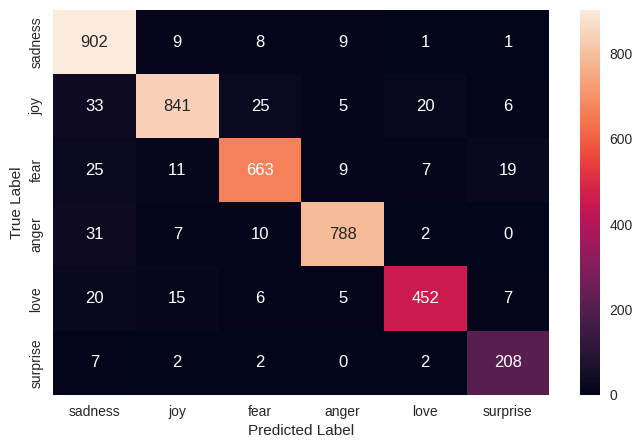

In [57]:
# Define the label dictionary
label_dict = {'sadness': 0, 'joy': 1, 'fear': 2, 'anger': 3, 'love': 4, 'surprise': 5}

# Create the confusion matrix using the label dictionary
cm_seq = tf.math.confusion_matrix(labels=y_test_ohe.argmax(axis=1), predictions=y_pred_api2.argmax(axis=1))
plt.figure(figsize=(8, 5))
sns.heatmap(cm_seq, annot=True, fmt='d', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> The result above shows the classification report for a model's performance on a dataset with six classes (labels) including 'sadness', 'joy', 'fear', 'anger', 'love', and 'surprise'. The precision, recall, and f1-score values are reported for each class.

> The precision for a class measures the percentage of correct positive predictions out of all positive predictions made for that class. The recall measures the percentage of true positive predictions out of all actual positives for that class. The f1-score is the harmonic mean of precision and recall.

> The weighted average of precision, recall, and f1-score reported in the last row of the table represents the overall performance of the model across all classes, taking into account the class imbalance.

> The macro average of precision, recall, and f1-score reported in the second last row of the table represents the unweighted average of precision, recall, and f1-score across all classes.

> Overall, the model achieves a very good performance with an accuracy of 0.93. The precision, recall, and f1-score values for each class are high, indicating that the model performs well in predicting all six classes. The model has the highest f1-scores for predicting 'anger' and 'fear', with f1-scores of 0.95 and 0.92, respectively. The model also performs well in predicting 'joy', 'sadness', and 'love', with f1-scores of 0.93, 0.93, and 0.91, respectively. The model has a slightly lower f1-score for predicting 'surprise', with an f1-score of 0.90.

## Comparion

In [72]:
print('Sequential LSTM')
print(classification_report(y_test_ohe.argmax(axis=1), y_pred_seq1.argmax(axis=1)))
print('Sequential GRU')
print(classification_report(y_test_ohe.argmax(axis=1), y_pred_seq2.argmax(axis=1)))
print('Functional API LSTM')
print(classification_report(y_test_ohe.argmax(axis=1), y_pred_api.argmax(axis=1)))
print('Functional API GRU')
print(classification_report(y_test_ohe.argmax(axis=1), y_pred_api2.argmax(axis=1)))

Sequential LSTM
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       930
           1       0.95      0.89      0.92       930
           2       0.91      0.87      0.89       734
           3       0.97      0.89      0.93       838
           4       0.92      0.86      0.89       505
           5       0.88      0.90      0.89       221

    accuracy                           0.90      4158
   macro avg       0.91      0.90      0.90      4158
weighted avg       0.91      0.90      0.90      4158

Sequential GRU
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       930
           1       0.96      0.90      0.93       930
           2       0.96      0.91      0.93       734
           3       0.95      0.94      0.95       838
           4       0.93      0.90      0.91       505
           5       0.90      0.95      0.92       221

    accuracy                           0.93   

> Based on the evaluation metrics provided, it seems that the `Sequential` GRU model is the best model to predict. It has the highest accuracy, precision, recall, and F1-score among all the models. The precision, recall, and F1-score are all above 0.90 for each class, indicating that the model performs well in predicting all classes. In contrast, the Sequential LSTM model has the lowest accuracy and F1-score, with lower precision and recall for some classes. The Functional API LSTM and GRU models have similar performance to the `Sequential GRU` model, but the `Sequential GRU` model has slightly higher precision, recall, and F1-score for some classes. Overall, the `Sequential GRU` model seems to be the most accurate and reliable model for this particular classification task.

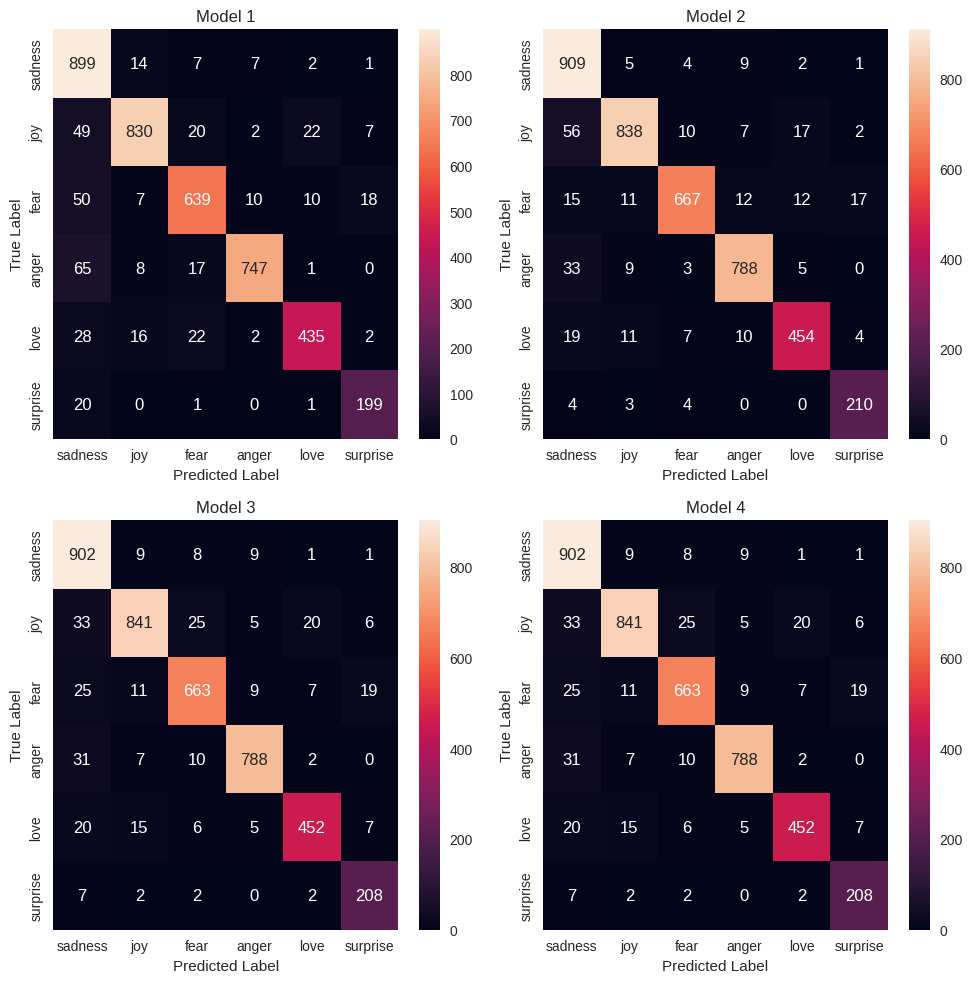

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the label dictionary
label_dict = {'sadness': 0, 'joy': 1, 'fear': 2, 'anger': 3, 'love': 4, 'surprise': 5}

# Create the confusion matrices using the label dictionary
cm_seq1 = tf.math.confusion_matrix(labels=y_test_ohe.argmax(axis=1), predictions=y_pred_seq1.argmax(axis=1))
cm_seq2 = tf.math.confusion_matrix(labels=y_test_ohe.argmax(axis=1), predictions=y_pred_seq2.argmax(axis=1))
cm_api1 = tf.math.confusion_matrix(labels=y_test_ohe.argmax(axis=1), predictions=y_pred_api.argmax(axis=1))
cm_api2 = tf.math.confusion_matrix(labels=y_test_ohe.argmax(axis=1), predictions=y_pred_api2.argmax(axis=1))

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

# Plot the first confusion matrix in the top-left subplot
sns.heatmap(cm_seq1, annot=True, fmt='d', xticklabels=label_dict.keys(), yticklabels=label_dict.keys(), ax=axs[0, 0])
axs[0, 0].set_xlabel("Predicted Label")
axs[0, 0].set_ylabel("True Label")
axs[0, 0].set_title("Model 1")

# Plot the second confusion matrix in the top-right subplot
sns.heatmap(cm_seq2, annot=True, fmt='d', xticklabels=label_dict.keys(), yticklabels=label_dict.keys(), ax=axs[0, 1])
axs[0, 1].set_xlabel("Predicted Label")
axs[0, 1].set_ylabel("True Label")
axs[0, 1].set_title("Model 2")

# Plot the third confusion matrix in the bottom-left subplot
sns.heatmap(cm_api1, annot=True, fmt='d', xticklabels=label_dict.keys(), yticklabels=label_dict.keys(), ax=axs[1, 0])
axs[1, 0].set_xlabel("Predicted Label")
axs[1, 0].set_ylabel("True Label")
axs[1, 0].set_title("Model 3")

# Plot the fourth confusion matrix in the bottom-right subplot
sns.heatmap(cm_api2, annot=True, fmt='d', xticklabels=label_dict.keys(), yticklabels=label_dict.keys(), ax=axs[1, 1])
axs[1, 1].set_xlabel("Predicted Label")
axs[1, 1].set_ylabel("True Label")
axs[1, 1].set_title("Model 4")

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


# Misclassified

"I want to see the texts that have incorrect predictions using best model `Sequential GRU`."

## Train

In [76]:
X_train_mis = X_train.reset_index(drop=True)
y_train_mis = y_train.reset_index(drop=True)

y_train_pred_miss = model2.predict(X_train_mis)
y_train_pred_miss = np.where(y_train_pred_miss >=0.5, 1, 0)

label_dict = {0: 'sadness', 1: 'joy', 2: 'fear', 3: 'anger', 4: 'love', 5: 'surprise'}
# convert predictions from one-hot encoding to class labels
y_pred_class = np.argmax(y_train_pred_miss, axis=1)

# find misclassified indices
misclassified_indices_train = np.where(y_pred_class != y_train_mis)[0]

# print misclassified data
for i in misclassified_indices_train:
    print("Index:", i)
    print("Input data:", X_train_mis[i])
    print("True label:", label_dict[y_train_mis[i]])
    print("Predicted label:", label_dict[y_pred_class[i]])

290/290 [==============================] - 3s 9ms/step
Index: 99
Input data: empty disappoint angry sad chaotic destructive feel today i be mad always fuck shit
True label: anger
Predicted label: sadness
Index: 335
Input data: feel weird turn events mar bite slightly weird prose
True label: surprise
Predicted label: fear
Index: 368
Input data: feel amaze tonight
True label: joy
Predicted label: surprise
Index: 424
Input data: alternate feel perfectly happy plan sad disappoint dont get experience real vaginal birth
True label: joy
Predicted label: sadness
Index: 443
Input data: i be proud word describe way make heart feel thank god supportive amaze hubbard
True label: love
Predicted label: surprise
Index: 471
Input data: still able remember single dull moment detail piss thing didnt feel comfortable
True label: joy
Predicted label: sadness
Index: 502
Input data: feel something inside something delicate peaceful unfurl inside chest
True label: love
Predicted label: fear
Index: 506
Input 

In [77]:
print('There are', len(misclassified_indices_train), 'texts that have incorrect predictions out of', X_train_mis.shape[0], 'or', (len(misclassified_indices_train)/(X_train_mis.shape[0]))*100, '%')

There are 136 texts that have incorrect predictions out of 9253 or 1.4697935804603912 %


## Test

In [82]:
X_test_mis = X_test.reset_index(drop=True)
y_test_mis = y_test.reset_index(drop=True)

y_test_pred_miss = model2.predict(X_test_mis)
y_test_pred_miss = np.where(y_test_pred_miss >=0.5, 1, 0)

label_dict = {0: 'sadness', 1: 'joy', 2: 'fear', 3: 'anger', 4: 'love', 5: 'surprise'}
# convert predictions from one-hot encoding to class labels
y_pred_class = np.argmax(y_test_pred_miss, axis=1)

# find misclassified indices
misclassified_indices_test = np.where(y_pred_class != y_test_mis)[0]

# print misclassified data
for i in misclassified_indices_test:
    print("Index:", i)
    print("Input data:", X_test_mis[i])
    print("True label:", label_dict[y_test_mis[i]])
    print("Predicted label:", label_dict[y_pred_class[i]])

130/130 [==============================] - 1s 9ms/step
Index: 33
Input data: feel someti ames distract neglectful thankful add another box check otherwise busy days
True label: anger
Predicted label: sadness
Index: 45
Input data: feel every step plan take divine help
True label: joy
Predicted label: sadness
Index: 56
Input data: visit ller country go expensive make stand sales assistants always stand right next look like i be go steal something feel really uncomfortable shop
True label: fear
Predicted label: joy
Index: 75
Input data: feel assault new kid whine
True label: fear
Predicted label: joy
Index: 83
Input data: feel like teeter edge hoard insanity come beloved clothe
True label: love
Predicted label: anger
Index: 85
Input data: feel faithful ever
True label: joy
Predicted label: sadness
Index: 86
Input data: finish watch korean drama secret garden omg feel way girls show mixture hope little tug truth say romantic gesture exist film
True label: love
Predicted label: sadness
Inde

In [83]:
print('There are', len(misclassified_indices_test), 'texts that have incorrect predictions out of', X_train_mis.shape[0], 'or', (len(misclassified_indices_test)/(X_train_mis.shape[0]))*100, '%')

There are 292 texts that have incorrect predictions out of 9253 or 3.1557332756943697 %


# 💾 Model Saving

In [89]:
model2.save("/content/my_model", save_format="tf")

# Conclusion

## Business conclusion
> From these results, they can be applied in various activities, including business activities. Emotions are a very integral part of human life. It can be seen from the text, what kind of emotions are reflected in the text.

> This prediction result can be used to identify customer reviews, social media comments, and so on.

## Selected Model
> The selected model is chosen based on its performance in predicting test data, where the best result in predicting test data will be chosen as the best model.